## Import Tools

In [1]:
import urllib
url = "https://raw.githubusercontent.com/Jwizzed/ml-journey/main/TTCV.py"
urllib.request.urlretrieve(url, "TTCV.py")
import TTCV

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision
from torchvision import transforms, models
import os
import TTCV
import seaborn as sns

In [2]:
TTCV.info()

+-----------------------+----------------------------------------------------------+
| Function              | Description                                              |
+=======================+==========================================================+
| report_dir            | Walks through dir_path returning its contents            |
+-----------------------+----------------------------------------------------------+
| unzip                 | Unzips a file                                            |
+-----------------------+----------------------------------------------------------+
| get_lines             | Read the contents of the file and return them as a list  |
+-----------------------+----------------------------------------------------------+
| view_random_image     | Visualize the difference in shape between two DataFrames |
+-----------------------+----------------------------------------------------------+
| get_train_time        | Gets difference between start and end t

In [3]:
np.random.seed(224)
# device = 'mps' if torch.backends.mps.is_available() else 'cpu'
# device
device = 'cpu'
device

'cpu'

## Get a data

In [5]:
!kaggle competitions download -c dog-breed-identification

100%|████████████████████████████████████████| 691M/691M [00:34<00:00, 19.1MB/s]
100%|████████████████████████████████████████| 691M/691M [00:34<00:00, 21.1MB/s]


In [6]:
!unzip dog-breed-identification.zip
!rm dog-breed-identification.zip

Archive:  dog-breed-identification.zip
  inflating: labels.csv              
  inflating: sample_submission.csv   
  inflating: test/000621fb3cbb32d8935728e48679680e.jpg  
  inflating: test/00102ee9d8eb90812350685311fe5890.jpg  
  inflating: test/0012a730dfa437f5f3613fb75efcd4ce.jpg  
  inflating: test/001510bc8570bbeee98c8d80c8a95ec1.jpg  
  inflating: test/001a5f3114548acdefa3d4da05474c2e.jpg  
  inflating: test/00225dcd3e4d2410dd53239f95c0352f.jpg  
  inflating: test/002c2a3117c2193b4d26400ce431eebd.jpg  
  inflating: test/002c58d413a521ae8d1a5daeb35fc803.jpg  
  inflating: test/002f80396f1e3db687c5932d7978b196.jpg  
  inflating: test/0036c6bcec6031be9e62a257b1c3c442.jpg  
  inflating: test/0041940322116ae58c38130f5a6f71f9.jpg  
  inflating: test/0042d6bf3e5f3700865886db32689436.jpg  
  inflating: test/004476c96f575879af4af471af65cae8.jpg  
  inflating: test/00485d47de966a9437ad3b33ac193b6f.jpg  
  inflating: test/00496f65de6cc319145ce97bd6e90360.jpg  
  inflating: test/004bf14426d1

  inflating: test/0415a2754ad5177df59e62a461604c14.jpg  
  inflating: test/041cf5964ef88d5a9bc2484c2fb35e19.jpg  
  inflating: test/042bfeb459b50977f590a341dfb20c93.jpg  
  inflating: test/04378b6550e324c2edfe51a23ed2f2ee.jpg  
  inflating: test/0441fda84f1eab8ddc72a8262a66e626.jpg  
  inflating: test/0448e6bdef9a5b0e3748028a76c4dfb0.jpg  
  inflating: test/04495ca69f279d9b2c38af99670dbb56.jpg  
  inflating: test/044b55c0f3ddceb089854c891c1fc01b.jpg  
  inflating: test/0457c8590e1ade1797e9896346e8815f.jpg  
  inflating: test/045e084e6ca9f5af87fb0f033670621c.jpg  
  inflating: test/045e64275a84a8fef942704c046ad98b.jpg  
  inflating: test/0464d087e3f88c601758bd46acfb38a8.jpg  
  inflating: test/0467770f34410f3fafd2482342d69f77.jpg  
  inflating: test/04713db71e256ff9339b36f8005bae13.jpg  
  inflating: test/0476e431ee08d486f1175f1a401dfafc.jpg  
  inflating: test/04790ec052c44f082c7f99b1ff26a78c.jpg  
  inflating: test/04864e3dd820187bf2d0baba8b94554d.jpg  
  inflating: test/048d0f89d66b8

  inflating: test/0980f210e23bf1d422f00f1a6f168d20.jpg  
  inflating: test/098bfb54af7aa639101b59206962e686.jpg  
  inflating: test/098f700ef2234a1ca91614ec51ce3c2b.jpg  
  inflating: test/099c7e227b6beaa4e87c893d25f56c63.jpg  
  inflating: test/09b770df98721d813129ba5c789b08a5.jpg  
  inflating: test/09be34319680d5e6a5608f74d4825271.jpg  
  inflating: test/09cbd98c55f58ad0535b5066c72e6e42.jpg  
  inflating: test/09d5118c848bc579eff8cfb669fd7aa1.jpg  
  inflating: test/09d8b8ff0e64f4e8f908827efdd114ae.jpg  
  inflating: test/09db0bb220cdbbc0adca63e38e64ab38.jpg  
  inflating: test/09e339bf702691a9f75b0d30cfca4314.jpg  
  inflating: test/09e51e17e2b756ff2ace8a87bd1443fa.jpg  
  inflating: test/09ef5442c370eb7eeb08e6796c5ff5b5.jpg  
  inflating: test/09fddf304d2789cfbb55935237dbac13.jpg  
  inflating: test/0a01f3b0c6d250c08785716c562e2d4d.jpg  
  inflating: test/0a053ff8908375e9579ead9f3965e0ce.jpg  
  inflating: test/0a0b97441050bba8e733506de4655ea1.jpg  
  inflating: test/0a0f82d4557f7

  inflating: test/0f19ffd8d0614958442cee26bc199d41.jpg  
  inflating: test/0f1bb5b5510c245aa1ec48bdad3495a7.jpg  
  inflating: test/0f1f058522972750c6afe200c02a027c.jpg  
  inflating: test/0f21800e7f10cc35725b82d34da94ce8.jpg  
  inflating: test/0f341494dfeb1318b50d43a4ae74e138.jpg  
  inflating: test/0f364859de4b5475265681eab503728e.jpg  
  inflating: test/0f3a0d6d2bbac0176da5c1a4b23bec47.jpg  
  inflating: test/0f3ac08b6178ce79358ac3f172820258.jpg  
  inflating: test/0f3dc83b50a8405f6079ad13c4b727e6.jpg  
  inflating: test/0f3f071f6d0afc5bc906aee0cfb3297b.jpg  
  inflating: test/0f40071bb6be117fc8ace2c2d2244761.jpg  
  inflating: test/0f407611b8b63474157e3de80b4c01bd.jpg  
  inflating: test/0f4a636da3a7f4dd52a4498a74653a8a.jpg  
  inflating: test/0f4b246cbf26bf1e6f6c89472443bf13.jpg  
  inflating: test/0f56064b344e608e11a41e3523eb3b89.jpg  
  inflating: test/0f58dffab12b3e92964731f3801ee4b1.jpg  
  inflating: test/0f59213057ba694005c0f5d8f32172d7.jpg  
  inflating: test/0f629dac2ecc2

  inflating: test/1443444abbb6e1d0974a0c8db8b42db9.jpg  
  inflating: test/1443f05f5281e3fe986fc40f7ee55c34.jpg  
  inflating: test/1448ce088a417e359510c6ec0b847daf.jpg  
  inflating: test/14495a39476bf7fb3ef0971c1edd76cb.jpg  
  inflating: test/144a87a697d9e819322ff0b8f57075e1.jpg  
  inflating: test/145dcdaf22ce5dca3bab26ea4eca752e.jpg  
  inflating: test/145e1b4570fd32057e82c8d5754576e5.jpg  
  inflating: test/14679a610485f8741de7472af7b22c38.jpg  
  inflating: test/147189dcaeffe1678893377fa4916cf1.jpg  
  inflating: test/1475328e0e3f2ef000606db1df2dfb3e.jpg  
  inflating: test/1479dff3f12686564bab8f9c016f3118.jpg  
  inflating: test/14831db5108c3b9c056efe04329a3916.jpg  
  inflating: test/148d0eefa7e51f564d04c43bb1a22821.jpg  
  inflating: test/148e793bb3b9d3c45de681e744752fcf.jpg  
  inflating: test/1493c4814ac4a2094162a8005fdff7f7.jpg  
  inflating: test/14957811daeeec6832cf1a03f56341b7.jpg  
  inflating: test/149727c54d9ca9e4757bc139afbd7183.jpg  
  inflating: test/149bd3015bd10

  inflating: test/199ef0c14f5083e0b3ca417fc8189ad9.jpg  
  inflating: test/19a22f9ed38c609f49b56323fdcf1a43.jpg  
  inflating: test/19a3f51f2473ba3def8fa21fc3f26eaf.jpg  
  inflating: test/19ab5466e29ae76e27d1c7211d6af610.jpg  
  inflating: test/19b1e11f86974f208cc97fefe7f8301f.jpg  
  inflating: test/19b6fda352ab1b71ecab1d7ebd27031a.jpg  
  inflating: test/19bdc20c98121b733bfbed25e6e5624d.jpg  
  inflating: test/19d09545a9c43a55be984279b12c6c6a.jpg  
  inflating: test/19d4c256efa1df2eb502d4e3fe6a7de3.jpg  
  inflating: test/19d6b8224b471815c850e149f0a67adf.jpg  
  inflating: test/19d9156a53d9f29305e2c3dcda475a2f.jpg  
  inflating: test/19dd56d1372f6e8f6dde7484ddacfd53.jpg  
  inflating: test/19e7eda1886b78f754522a4dccaa480a.jpg  
  inflating: test/19eb30911450a6314e3875558012f0e6.jpg  
  inflating: test/19edaa27d65bb14aa6140ac05910cf80.jpg  
  inflating: test/19f85012f6cb636e921c947dc7c5b48d.jpg  
  inflating: test/1a034702ad59d6aa0da27509666186af.jpg  
  inflating: test/1a12a1ebb9a75

  inflating: test/1e7356e15911f32f972271f28fcc6288.jpg  
  inflating: test/1e7553c33e4b4ee3348f26e7ee63f867.jpg  
  inflating: test/1e776d9f11d5f8da33acac2041b58c4d.jpg  
  inflating: test/1e7c9f4b611a9f917c492e83a0d54704.jpg  
  inflating: test/1e80fc8ee50381cf8a6c6ae20e90e911.jpg  
  inflating: test/1e874cabd2a0c2ed2b8f1852752bd872.jpg  
  inflating: test/1e8f9ee9e95a80ea5053a886d37b8a70.jpg  
  inflating: test/1e9356099572905f1a00f5d8041ec52d.jpg  
  inflating: test/1e948d3e5358f0d736bd9648b5558b13.jpg  
  inflating: test/1ea22244a23b4f419be97c8f3e350010.jpg  
  inflating: test/1ea31b4e922ba6a942a3a530c2c04e15.jpg  
  inflating: test/1eaa414c22931039f4e8b9502f88daf9.jpg  
  inflating: test/1eb19591afd2bd99fb5656f57282c941.jpg  
  inflating: test/1eb59d5b26bfd913ba0f8c14dfc4adbe.jpg  
  inflating: test/1ebc125fc9bd029631a5a81b8aef6757.jpg  
  inflating: test/1ebcd2c9321bb3d7bf8095832b74a3f2.jpg  
  inflating: test/1ebed5934a1d00fa2c65605c7b84ddc3.jpg  
  inflating: test/1ecbf47a05947

  inflating: test/23df0336ab3f54104f8702bd9d8e4cbb.jpg  
  inflating: test/23e05851da8dad6e64f3ba6ccfc3ea59.jpg  
  inflating: test/23e3de07d79b125aa21651f6d2bb972b.jpg  
  inflating: test/23e96791e6156374a4df86004dbc1d6f.jpg  
  inflating: test/23e9f1d6a1a0d5a7b495b3f4795187d8.jpg  
  inflating: test/23ebeb57e74030f84613c46d473fa37f.jpg  
  inflating: test/23ebf0984257373fa2b942173a486edc.jpg  
  inflating: test/23f8bbfda11fdf717b1e15824c689352.jpg  
  inflating: test/240466d7cb9501fca06b5cc153f2ba88.jpg  
  inflating: test/24120d84936d859bb2fe013e5579ba57.jpg  
  inflating: test/24193dad6b66cb25cca7e84d731d4290.jpg  
  inflating: test/242249915eb950d16e73011a2edba0bc.jpg  
  inflating: test/242752357be60ce41627d0d021d36087.jpg  
  inflating: test/2428c57f36d78d99bacc93ae2b4d416b.jpg  
  inflating: test/242b318606d32f56bce2d480d878964e.jpg  
  inflating: test/2450a7eec463a780dee7854cc749a158.jpg  
  inflating: test/245a48e4fd9e78180218c676638fec0f.jpg  
  inflating: test/2464089ba3fc5

  inflating: test/287ed74c0621e159012edae3e590bbff.jpg  
  inflating: test/287fd40312eb7b6d0d732558eb9122f7.jpg  
  inflating: test/28826c8902e4b36658d0729705097e24.jpg  
  inflating: test/288d0dd40f6187d7c0e6962e9b9e64d1.jpg  
  inflating: test/2890e797b95ad607e150528964026d26.jpg  
  inflating: test/2892dcbd7f772140bbb6eee15f313550.jpg  
  inflating: test/28950f53443e40e5a704a8cb5a1e1d35.jpg  
  inflating: test/2896468b0aa9423a2db1b25f24412a67.jpg  
  inflating: test/289a32d05731a84d5f05d63d4f4d151c.jpg  
  inflating: test/28a0203fe6128b2d1eff82d9ed494fb3.jpg  
  inflating: test/28ab9b058c7df36fb217098acda41beb.jpg  
  inflating: test/28b30b0bf0eb138e89aa590e4a3ebdd9.jpg  
  inflating: test/28baad5964569a06c8d6474051fc5d3e.jpg  
  inflating: test/28be661edf678a730dde4b41918f3dca.jpg  
  inflating: test/28c00df54f68e883e40c9ac8f023202a.jpg  
  inflating: test/28d35718a4627178efa7055f52ce8a07.jpg  
  inflating: test/28d59cc36a9bb41dcb29cc0681bdb0c8.jpg  
  inflating: test/28d6506ec1073

  inflating: test/2d6b6491c6376e487f40c222079950ba.jpg  
  inflating: test/2d758b46d8b2da00c78d0a13241a5637.jpg  
  inflating: test/2d7c2ac3fe912d9545ba692490b45d00.jpg  
  inflating: test/2d83147d68b1158edc0eec2f11a4f26a.jpg  
  inflating: test/2d870d3e216d4edacaf456d1d5fd7cf1.jpg  
  inflating: test/2d8b78d291ba57b21c1893e1a6489dbb.jpg  
  inflating: test/2d8cc8db157895f8900407d349564e63.jpg  
  inflating: test/2da4daf384ddd2c4b05f5c3ba623a695.jpg  
  inflating: test/2da554d6f7e0d4641a1b553af06e5f3b.jpg  
  inflating: test/2daacdf6147e04ce83f17afe6e70a760.jpg  
  inflating: test/2dadffa582b5b571169f9743b8d29ddd.jpg  
  inflating: test/2db034155afba138269547667f7982a6.jpg  
  inflating: test/2dbacd22574e6f6dbc22007491bdb752.jpg  
  inflating: test/2dbb3ba443227a14acd60b8aebcd80bc.jpg  
  inflating: test/2dc17c374b19ca2352091f7d9b7945cc.jpg  
  inflating: test/2dc48f522825e614edd1c5a3c43682a7.jpg  
  inflating: test/2dca1e75b099224d925c3512a8bf252b.jpg  
  inflating: test/2dd85ee4d1315

  inflating: test/32933a3ae73abb7a83493563eb1ce364.jpg  
  inflating: test/329754c8127a0e2b35ec0a0fcf235d16.jpg  
  inflating: test/329ac468a67e008c9d3c8d3bd3ae0a03.jpg  
  inflating: test/329b1ef3e91e807eb6135475ee947e30.jpg  
  inflating: test/329d3d6fea50b2ce65c611fd5b31d1d2.jpg  
  inflating: test/32a0bd5889f4ffe8d663ee6b0e557da4.jpg  
  inflating: test/32a122fa4400eb8144760961e121beb7.jpg  
  inflating: test/32a2c2c2531fbe01b5aa8236000a3046.jpg  
  inflating: test/32ab38fc8791efdcfcbbab773f2cba1e.jpg  
  inflating: test/32af86f0ccd36975cc43113dedbde438.jpg  
  inflating: test/32b09857c983edf030d8b27136a841cc.jpg  
  inflating: test/32b4850ac87ed096cfe5d583ed95f156.jpg  
  inflating: test/32b7862595747b27c8683b627858d2b1.jpg  
  inflating: test/32bd9fcd630e035cd8962653f1c04ffa.jpg  
  inflating: test/32c2c04a7c497e9d7b8a9f4c841c4523.jpg  
  inflating: test/32c88a21c86293c59b59563499ac48a1.jpg  
  inflating: test/32c9cfccb110a85a09a1f5ad73bedaf4.jpg  
  inflating: test/32c9ed26072a2

  inflating: test/37d4c66da9bd8843fa926df8c62ae26d.jpg  
  inflating: test/37e091359191cf82e1d2adc38d5f0c64.jpg  
  inflating: test/37e6b8c633703029fd528883d8ebf9b7.jpg  
  inflating: test/37f91f5de2d6ecedb6abebff33d7fa17.jpg  
  inflating: test/37f99379060ae74e3bcc26762753a826.jpg  
  inflating: test/37fdddbc32d25614da746f91fdbf54e6.jpg  
  inflating: test/37ff0ff1df2c0d110da5525fe45cebfb.jpg  
  inflating: test/380433678c92cf91040e4e4b60b0ef2a.jpg  
  inflating: test/380dd7b2b1c76c3c91a65b4b35d1f0ea.jpg  
  inflating: test/380eb30f1459f362034552147a7104f8.jpg  
  inflating: test/381de4fab27fbb64824e39dfe1e09d0a.jpg  
  inflating: test/3822d373e39ed9e4807df83ef3b20ae1.jpg  
  inflating: test/3836dac7313ba15526cd031b72af37f1.jpg  
  inflating: test/38374ec73cff11ea2be55ab8b4c54dac.jpg  
  inflating: test/3837e2767f6a6aa84c032383b0b381e5.jpg  
  inflating: test/3839723ca994957060885ee8e69c97c6.jpg  
  inflating: test/383ce456e0b8cd72d690f0fe9280616d.jpg  
  inflating: test/383f5efe73a0d

  inflating: test/3cc169af652a3252dfa5b580d450243a.jpg  
  inflating: test/3cc25bc7e52a634385c9b70861fe8a2f.jpg  
  inflating: test/3cc9adc023849da1316cfeb2bb53867f.jpg  
  inflating: test/3cd083c459f059362fcac2f44e24a045.jpg  
  inflating: test/3cdf577564b8a3fb327e90cae126ec81.jpg  
  inflating: test/3d0c7d7db4d56bcc3bea0eb6a04b65b2.jpg  
  inflating: test/3d0d318ff197407a09c0454a91c2ba8d.jpg  
  inflating: test/3d14a8b14fef796faed70f1bd6606db7.jpg  
  inflating: test/3d175317de266fa14704357907d9f37b.jpg  
  inflating: test/3d1a15fec91e3648daaf273373a1c03d.jpg  
  inflating: test/3d1e28e268735f53b66138aef843996b.jpg  
  inflating: test/3d21bad224c499c98efcc14445e42960.jpg  
  inflating: test/3d3613d02356f0b794c69f85b3b179fb.jpg  
  inflating: test/3d389d6c8f70a5623445c9f40d57789d.jpg  
  inflating: test/3d3a6a1d9c0270b20fc96ce1159248e3.jpg  
  inflating: test/3d43b386c3982f8d588441533bb06f86.jpg  
  inflating: test/3d47c7d4b52c2d609d318dfcc416f839.jpg  
  inflating: test/3d57613021429

  inflating: test/4354c238d7741657af0e18a08fd836fd.jpg  
  inflating: test/436121377cae78c93e1abe991b7fbf82.jpg  
  inflating: test/436905a18153b169c71cc3ab7fb2091c.jpg  
  inflating: test/436aa6788ee1824469f299237f2e2554.jpg  
  inflating: test/4373bf011fc1cb716d646b5d21809632.jpg  
  inflating: test/4384c3b98fdd1d17fab4504b7f80a00f.jpg  
  inflating: test/4384fc6887440d1d46dafbd0a6bdad71.jpg  
  inflating: test/438c0bf05096382172a77995a2ba4778.jpg  
  inflating: test/439111fd7dd38cb5b160a44a40cba3d7.jpg  
  inflating: test/43a001eba1806acfbd90f5fabbf55659.jpg  
  inflating: test/43a411e0747a0b39cbbed7802c5b6013.jpg  
  inflating: test/43a51ef131cef93b0d44c0322a44cf27.jpg  
  inflating: test/43ae04d76f80087f01dea6c0cbcc3e31.jpg  
  inflating: test/43cb5f3a505d710bd16e0a0d583a781b.jpg  
  inflating: test/43cd7e4fee2ecb224604ca96c946baf4.jpg  
  inflating: test/43d06e8a7357f6392a329852b789949e.jpg  
  inflating: test/43de95b59bbd14661336d2abcbe216ae.jpg  
  inflating: test/43e3aef42684a

  inflating: test/48efda8d38f52447b9ff85370c228091.jpg  
  inflating: test/48fe589e1986cc099c2f543b8d9ba1cf.jpg  
  inflating: test/49036b1a3df85e0b00cc6a6158fdb713.jpg  
  inflating: test/4909fc5b89f974fa007c12ba62ecf785.jpg  
  inflating: test/490cd0d0afa679bb3df28342897f9d6c.jpg  
  inflating: test/491c027fad481bc99b0fd49ca3d98d8f.jpg  
  inflating: test/4927b65015742aa5f7574e3f8d0b4c90.jpg  
  inflating: test/492c1ecc6dee91c3251766eeadd4ad9d.jpg  
  inflating: test/4930642aa60e3d15c94e85eed2d894bf.jpg  
  inflating: test/4935b03b1aa603b71307dc8f0831c848.jpg  
  inflating: test/4938f6a413f3efd8740216b5f148bb7d.jpg  
  inflating: test/4944813fa9c0c93048f6bac5b5cd3d49.jpg  
  inflating: test/494ca45415a021804cbc9810ed640b5f.jpg  
  inflating: test/494fb8e925492b564e83483b4c99c9a9.jpg  
  inflating: test/49549da1672035afd7b8f817d8cb6a5d.jpg  
  inflating: test/49593c08eb1b55c629fa03a939f54626.jpg  
  inflating: test/495cc4fb98ef22fb6f3cc26d0b496051.jpg  
  inflating: test/49600840847a7

  inflating: test/4ea0130ffbe06871063bc51d23894b12.jpg  
  inflating: test/4ead408f81b09e617882bcad28bf7593.jpg  
  inflating: test/4eb48e0523600ddd19dad73a7ffe2334.jpg  
  inflating: test/4eb9c0b40bf62d82942665e2530fa908.jpg  
  inflating: test/4ec4f48a2d9a7997c1012773bb15fe8c.jpg  
  inflating: test/4ec6c0d61750599636d6946a6374078e.jpg  
  inflating: test/4ec6fe076b150ca77641a4bf676d89c4.jpg  
  inflating: test/4ec9d65e78c1c468ce371c4141d0d301.jpg  
  inflating: test/4ecadc974de67ce3358e17950589007a.jpg  
  inflating: test/4ecbc5bb44b00a168f353df336c4480e.jpg  
  inflating: test/4edda78c9a49e0e8a866966275178124.jpg  
  inflating: test/4eddf528862bc0a1e5c0c84d5c25cbcd.jpg  
  inflating: test/4ee390984a81b161806e9a58c923151b.jpg  
  inflating: test/4ef2b99d3028844d067feda58dc5f1f0.jpg  
  inflating: test/4ef61842a22740d920ff041d3271731a.jpg  
  inflating: test/4efacbc76bcd2b3706cc3b908de9ac5b.jpg  
  inflating: test/4efd18204c98543662580a1874f79d31.jpg  
  inflating: test/4f06a97002f94

  inflating: test/53228eb119340867718b808e363e3e5f.jpg  
  inflating: test/5325c84dafeec70d457b992795294317.jpg  
  inflating: test/5327f542d73d60a2ea17335a210a2f84.jpg  
  inflating: test/5328864b2d5c6f2d353a4445e974272c.jpg  
  inflating: test/5333ccb08620f8f0855750adc4138c27.jpg  
  inflating: test/533f4094b80a234c74cbd2ea942060cf.jpg  
  inflating: test/534453f05ebeff6f8c3a9661168a3df9.jpg  
  inflating: test/5346579c4a603e9acb2a12cce9d0752e.jpg  
  inflating: test/534c23db9b723108381515a30c3ccb6f.jpg  
  inflating: test/534fec8d4384410956faae3b0fb5a239.jpg  
  inflating: test/5352f9494a1f1a3dcf56a7153d844926.jpg  
  inflating: test/5361283e7d99e055e283cbf1a5159b5b.jpg  
  inflating: test/5361ce8afa30a9bda6f6f49bc13596ee.jpg  
  inflating: test/5366834111cdfdc1876d2ce66ca8dead.jpg  
  inflating: test/53707b51974f99f4043ffc7f715ef6e6.jpg  
  inflating: test/53789615849b9f618c279670c859f61c.jpg  
  inflating: test/5387a63544fd5e573ea6340bc7f26f73.jpg  
  inflating: test/538e7a043f443

  inflating: test/5841eb6b67eb578868ddce0576d5e89a.jpg  
  inflating: test/584dddf504048be859bc0be7ab8c3f3d.jpg  
  inflating: test/585aaff09df42cf4a6397a87224da814.jpg  
  inflating: test/585eb4ebf4b4369a9d252964ba51408b.jpg  
  inflating: test/5861b3c8a007a97e867a19afdc234a9e.jpg  
  inflating: test/58657786baaa98ea777000c3a3b4e899.jpg  
  inflating: test/586b80f5018bd4d42f497de2f2c6e93b.jpg  
  inflating: test/587e40c6929ae21fa8939cf1cf5dabbd.jpg  
  inflating: test/58829252a5cf7d85630f26d0a7dd86e8.jpg  
  inflating: test/58885a79643c3a480aa9dc2ebef7672c.jpg  
  inflating: test/589bb60e4b577137ed01dc735482d87f.jpg  
  inflating: test/58a7ab5a9efc2734ce75d94825b36397.jpg  
  inflating: test/58ab20417fd27ac491aa8feffb669db8.jpg  
  inflating: test/58b24668bcf9771f144e1478a847a26c.jpg  
  inflating: test/58b5067645013105481df62836c5599a.jpg  
  inflating: test/58be6588afa4d98be660700637efaa8d.jpg  
  inflating: test/58c35fe95f8466c8136550467d5121a7.jpg  
  inflating: test/58c9184e27d29

  inflating: test/5d5e2eec4b0711692836e41787c9ab5a.jpg  
  inflating: test/5d5ec7782eac56d49de059f156b09ded.jpg  
  inflating: test/5d9c0c30c1908e9ef0390120a9eb41c8.jpg  
  inflating: test/5d9c3933d1a1768ac9bcae53164219b5.jpg  
  inflating: test/5d9dbd6fb2bd2df81443509a0e60a7c3.jpg  
  inflating: test/5da496f95fa3f2d48dddb29a62d12083.jpg  
  inflating: test/5da5421170fe90206f3bcfeae91bbf1d.jpg  
  inflating: test/5daa673bfb4a8bdc959b2bb6054bf4e2.jpg  
  inflating: test/5dac8f13467994de6ba778df1cdba3fd.jpg  
  inflating: test/5dbae9788a740ea9b923303391ceeaa3.jpg  
  inflating: test/5dc186c9daa7e424878248d6bd88cae6.jpg  
  inflating: test/5dc9fcab9438b00d5b27f7ffd30dc218.jpg  
  inflating: test/5dd0213b5436227a2337c1f6f0d966b6.jpg  
  inflating: test/5dd75bfbd73347508797f6f01008a3cd.jpg  
  inflating: test/5dd8f562b668e6729037b00a096a5e66.jpg  
  inflating: test/5ddba224954d46a81d99a2222f1edba4.jpg  
  inflating: test/5de51bbe456c805ced8c5f302a89067c.jpg  
  inflating: test/5de79cddad717

  inflating: test/629a627eb84b246338859ebb6387183d.jpg  
  inflating: test/62a1f5495c9787325514e9ba02612af0.jpg  
  inflating: test/62a42c4cb9b3e9eef40a9dd4a5cf1431.jpg  
  inflating: test/62a44eaa5e7a2e0aa33eb823578a45d4.jpg  
  inflating: test/62aacc90863d9c0bca1a097cb92c2fd6.jpg  
  inflating: test/62af5f2c45270fd9361bab054d0ffdf6.jpg  
  inflating: test/62af826ea5c3f26d8c5b8b1f8e4c7b3b.jpg  
  inflating: test/62b233a64d7c1cac7ad4b5831f6bd121.jpg  
  inflating: test/62c5aedd31addd5036db8fc6ac845440.jpg  
  inflating: test/62cb6f10735860b02cfbe6d6ba8a2d55.jpg  
  inflating: test/62cc5d37bc91403eae2561975c414579.jpg  
  inflating: test/62d04ec9e338f9a2da05e02d043c94e5.jpg  
  inflating: test/62d5e7439b20721d154bff6d51f0d2a8.jpg  
  inflating: test/62d7d1666d69b56bac43a4757b5be0a9.jpg  
  inflating: test/62e6913850dffd8a582c9e2df07c382d.jpg  
  inflating: test/62ec35974e0d3db7e924eb04f6a011e6.jpg  
  inflating: test/62f0755b86cceef4244c9bcbce1b68e5.jpg  
  inflating: test/62f97b18973de

  inflating: test/6745cdcdaf788e189b88392e8294f82d.jpg  
  inflating: test/6752b97b68a42146006b410342029847.jpg  
  inflating: test/6754ce6089f5837708a902d2afed0c1e.jpg  
  inflating: test/67599f5e5c25cf1a9d7c86ffa5b199a1.jpg  
  inflating: test/6765b2e22a3152dc2f645438bd6bfb8c.jpg  
  inflating: test/67709931f291cf5e4f2931c65c4c80af.jpg  
  inflating: test/6770edd7893c3521c9c197b8169ab5c6.jpg  
  inflating: test/6773de1e84e4c85e120564d6841fe6ae.jpg  
  inflating: test/6799a8b267302cf26b05b098db473c02.jpg  
  inflating: test/67a44c1fbda4b0774cad1207895c95ee.jpg  
  inflating: test/67a97d6b72d2fadfb3fbbf29cfdd9eb1.jpg  
  inflating: test/67b3f084990fae09436ded7fd2b71064.jpg  
  inflating: test/67bc2e98f79a96bc5ab5df62386a92ae.jpg  
  inflating: test/67c4be4041eedd355dd7c3fdca9708d9.jpg  
  inflating: test/67d17625287f1a4b64124f6065ec8701.jpg  
  inflating: test/67dc12e769a11c880f5d23c26f942ce6.jpg  
  inflating: test/67e92bf555972f37671bfcad7f78302b.jpg  
  inflating: test/67ea28f2191ab

  inflating: test/6c924ee8afc955214b93f0fe3fdf670d.jpg  
  inflating: test/6c959ab8926c4699bcab8bb414b6a78f.jpg  
  inflating: test/6c9a34a3d12bef8c3b02aa5a49cac53b.jpg  
  inflating: test/6c9d748c5a472b7f2d51a8f08ac294a8.jpg  
  inflating: test/6ca417eebb9dd928352f0c6fcff17851.jpg  
  inflating: test/6ca7b65a34be7ab2e90203c844946b1b.jpg  
  inflating: test/6cb44c0db0f03b690e2400c1e47d8596.jpg  
  inflating: test/6cc15e9d43e8a5c73ecd81da2b9f04fb.jpg  
  inflating: test/6cc610b4b7cc0becebf96476643833fe.jpg  
  inflating: test/6cd1a9cbd3d52ed1fd1c07630dd77505.jpg  
  inflating: test/6cd533659fff771040a8c7419ada84f8.jpg  
  inflating: test/6cdc5fd54c442b1107d33ce0c6d3e873.jpg  
  inflating: test/6cdeb78e8f82c198aab807c270aa9b30.jpg  
  inflating: test/6cdfcb145c9ecc6d65edf561c43e9aee.jpg  
  inflating: test/6cdff5325cb35cfd44447b9e4f6cb7b4.jpg  
  inflating: test/6ce2f79bfc8e23d4158f79d1b2d034d1.jpg  
  inflating: test/6ce9a737f73ced0e6a43a2e08d904adc.jpg  
  inflating: test/6ced8ffc5b08d

  inflating: test/71c1909dc55d0d8cf1a8e2e853bd30f1.jpg  
  inflating: test/71cd1ef653a545062093510ab36004b7.jpg  
  inflating: test/71cf1e220572c48e8a22204f91eb481f.jpg  
  inflating: test/71d37071a1b254d58519b997ac0c0770.jpg  
  inflating: test/71d74387ba7dd965b5aebae6a01a11f9.jpg  
  inflating: test/71d8ea950f6312b766d75d6ad8ac3ba2.jpg  
  inflating: test/71df16c0d40fc027a2427dae656d660f.jpg  
  inflating: test/71e326341469e1b27640d00d73c20ce9.jpg  
  inflating: test/71e6335ba4377eae9f4ef2839aa47df7.jpg  
  inflating: test/71ebb0c1014b1475b62a30aef8c31e98.jpg  
  inflating: test/71f115fe5693ef5d46741d556953c9fe.jpg  
  inflating: test/71f62260bedbd2fcbc477bac4bdf1140.jpg  
  inflating: test/720524b5d267c67a3b962dae2f0bd5bb.jpg  
  inflating: test/720e01c9e6d5b4a4fc3cd33e5609f377.jpg  
  inflating: test/721a16a593ca197c75eec1f2a6fe3cea.jpg  
  inflating: test/7225e0eca6be98840b101e086f03e060.jpg  
  inflating: test/722b105529e2516463b9848888322b9e.jpg  
  inflating: test/722f83aa7a932

  inflating: test/75fb6890f3cefa75da91bb921a9877e4.jpg  
  inflating: test/75ffafddff500cd8e7f0de2e729914bf.jpg  
  inflating: test/7603a1e5ec7825b354d3d9f2dc0f6059.jpg  
  inflating: test/76048c1354de715d306ae16b55029a34.jpg  
  inflating: test/760c63df844fa16bd2cecb53abf4048e.jpg  
  inflating: test/7611c6281dd2c785743fc0fc47c165fc.jpg  
  inflating: test/7613042504cd73273ab2607cf518ba92.jpg  
  inflating: test/76130b7b1eae72e002512087b22cc938.jpg  
  inflating: test/761c73bdd557a581c877e5ccf4d2e0c0.jpg  
  inflating: test/761f5d01c29f8f8d51c45a28bb2c64ed.jpg  
  inflating: test/762376a3788f0cbd2d143d469ed44a4c.jpg  
  inflating: test/762c598988525da91610c46e7a690343.jpg  
  inflating: test/7632300f2614bb34b5f167224c2bb680.jpg  
  inflating: test/763488adf6707c222a35543b0bb57116.jpg  
  inflating: test/76510d1c9a1da15997ecef0e4a7a6340.jpg  
  inflating: test/76531862332e28e3e356e5d6829e1a4e.jpg  
  inflating: test/765411aed5e7b471be622120a65e690a.jpg  
  inflating: test/765e7af138f98

  inflating: test/7af7f4c5c844f4dec9f55f9db94b4d9b.jpg  
  inflating: test/7b0085275ecce46eff3ee4d2015a1af9.jpg  
  inflating: test/7b14d3e5966ed455ba3e8b0c305c7bf8.jpg  
  inflating: test/7b153b32c289f5dd2d969a37dca177f5.jpg  
  inflating: test/7b1883b3c99c234dc623b842ce5cfb63.jpg  
  inflating: test/7b1fddc813adcb2b3519cb590d82f62e.jpg  
  inflating: test/7b2afd50a12d0a24be71e246756fe2fa.jpg  
  inflating: test/7b2e25dfb12d69566e59246970f161b1.jpg  
  inflating: test/7b3681e086471ad4eb4a3986b55b8b84.jpg  
  inflating: test/7b37af62f102cef63ee44361b2a4bb2d.jpg  
  inflating: test/7b3a9c2f5f01acd4846bdc65f4190ece.jpg  
  inflating: test/7b3ddecf0a8f49e32ba3f9055c9ff5c3.jpg  
  inflating: test/7b3ffac7ead20a7062d917ad210e6b08.jpg  
  inflating: test/7b426d962aefdf4a3efad05b346d6105.jpg  
  inflating: test/7b4465b05399a7a0d5d16725ae547545.jpg  
  inflating: test/7b488c52e0d2a7df0a4ca8f4b1be94d2.jpg  
  inflating: test/7b4a5c0a390fc553a71bf4fddb4b05aa.jpg  
  inflating: test/7b515441a9497

  inflating: test/8033f7230602b7871baf97987121a955.jpg  
  inflating: test/8038003c3e3693496987aa077ee7c850.jpg  
  inflating: test/8039f8c115eeaaaa324820bb49640fcd.jpg  
  inflating: test/803d7415c42d682a9eff453115163fa1.jpg  
  inflating: test/8050f094a4f5d3cc56fe314e524cd126.jpg  
  inflating: test/8055e0c6e62d55cf5e0574c5a21d1137.jpg  
  inflating: test/8058827b5d7c206c95f6ce73377198be.jpg  
  inflating: test/80596004bab066c48783d99baa38e71e.jpg  
  inflating: test/805d229571294da3389e07e3e59bcfa7.jpg  
  inflating: test/80663f48e62d2c12e5b6f9c148b8f493.jpg  
  inflating: test/806868d9965dfca53ec6553678643e5a.jpg  
  inflating: test/80772a2c72d253b2834b6975db3f6cc7.jpg  
  inflating: test/807eab82a78dd9516eb084ec722ce248.jpg  
  inflating: test/80935b00b1a45cad8eef436f39f9e876.jpg  
  inflating: test/8093dcff976bdb084cacf1a2b534bfa9.jpg  
  inflating: test/80c1ddf9d12bcf4b1bae4f13d63e8913.jpg  
  inflating: test/80ca00d1e173fc554f845789c02db0b7.jpg  
  inflating: test/80cf8701ca7cb

  inflating: test/85c9d2802ea11ac1baa5f941f60f046b.jpg  
  inflating: test/85cc17a7822c05deb8e78bd391e37ad6.jpg  
  inflating: test/85d952743882c67440266ed2e48d0e13.jpg  
  inflating: test/85d9efa867aae45a6a8583c942945ffd.jpg  
  inflating: test/85da4243dc1d77d693c941d8be0974be.jpg  
  inflating: test/85e0fbe0230b40795feda0d64e9af9e2.jpg  
  inflating: test/85e749d2b349c2aa648cb650d6b31797.jpg  
  inflating: test/85f2aba8e25b656a368222ff84e2dc7e.jpg  
  inflating: test/85f498ec5b8bd0e96b53c4d75737c4de.jpg  
  inflating: test/85f5f54e24db0bb9b2a44e37f67ad60d.jpg  
  inflating: test/8600c6a30401005de8d7f54876520992.jpg  
  inflating: test/860409613c002d1684659434cc3b7815.jpg  
  inflating: test/86089d915bbfe1a7d84acbc929b150c3.jpg  
  inflating: test/8608b39ca999c8ff31e0f032a2576908.jpg  
  inflating: test/8636f5669797f54ecdb973ed9e9f6f1d.jpg  
  inflating: test/8644dd377f4775b17bf8c914265b149c.jpg  
  inflating: test/86456f35a5ba9fc4e0001591e7d5957d.jpg  
  inflating: test/8645d8323d0dd

  inflating: test/8bcd7f1a3db6fbea8ba681aa7d4ebc1e.jpg  
  inflating: test/8bcd9b2e171111039c45518139d0417d.jpg  
  inflating: test/8bdc1bb017b6d13f87819804504953b3.jpg  
  inflating: test/8bde8fb33daba35bbf4e6560e5bc45a6.jpg  
  inflating: test/8bf189c52b9c3a9ca2095515b24d60d8.jpg  
  inflating: test/8bf8defe18c6db0efbd60d80706b1eab.jpg  
  inflating: test/8bfaadf26932b13538d99ec45aacf15b.jpg  
  inflating: test/8c1449129e0f0560d254961eedb718bd.jpg  
  inflating: test/8c1b371cc8d0d0949889da9c95bbe24e.jpg  
  inflating: test/8c20eefa661a36f6c8dbf4047a7d568f.jpg  
  inflating: test/8c258ae1f133a0f970ba981bafb73bdd.jpg  
  inflating: test/8c325e060e3ef7a833861e834be15abe.jpg  
  inflating: test/8c3d8b3dba778fa9dd1753315a5afe13.jpg  
  inflating: test/8c495e6a6f7cd44e01a823a6c767b2da.jpg  
  inflating: test/8c543f881fbed3b143f8eef96968514e.jpg  
  inflating: test/8c5442d028fdf92119a23980f1ae2885.jpg  
  inflating: test/8c55bc2ffeba5ca56a0557998b5521d8.jpg  
  inflating: test/8c567325012bf

  inflating: test/917d90061274aa36b86eac30d2771ed3.jpg  
  inflating: test/918b82a965d04368a095f574ef053292.jpg  
  inflating: test/918cf220249cc388fa95140f1a18960e.jpg  
  inflating: test/9196feeb6deb5d2e6db47cad869e3c5f.jpg  
  inflating: test/91972d388bd30068a0e174ac79249980.jpg  
  inflating: test/919e0cdf68e1195560fdde08d50cb193.jpg  
  inflating: test/91a56212d14e244423bea13c93c77cab.jpg  
  inflating: test/91b2e5c91451045d74ce74b74a89ba1e.jpg  
  inflating: test/91b4368baa806e2872145853c763c354.jpg  
  inflating: test/91bfe31395da3830ce1d81904cd7a60e.jpg  
  inflating: test/91d861224055c595b63e569d41426637.jpg  
  inflating: test/91e6c6fbf42bc6a74db07709f904a256.jpg  
  inflating: test/91f2d77acdbe7628a70f16b35ac2798d.jpg  
  inflating: test/91f4724d4014f11174fe29fbac85aa90.jpg  
  inflating: test/91faa9c8a54b8d32f34351de3b48c432.jpg  
  inflating: test/91faba2e7bd694aec44c6d91e386445b.jpg  
  inflating: test/91fbe795d1e4dfc30bb003a1411b7e0c.jpg  
  inflating: test/91fdbcc6640c5

  inflating: test/96c273964a8d15f3849f309fbdd4f0ea.jpg  
  inflating: test/96cd94b8c5a2ce8e4253f9eb2666f7da.jpg  
  inflating: test/96d5e6dcaad661f58834571d127cecee.jpg  
  inflating: test/96dae94f0daf619f6dd5b93c15962730.jpg  
  inflating: test/96e0505c4623a11b8c062f7bc874bde7.jpg  
  inflating: test/96e144a1956c0d827478a51a6525eb95.jpg  
  inflating: test/96e221a0185f9dc88f5c6ca3d0912b79.jpg  
  inflating: test/96eb1dae33d7bc829d91fa9159892592.jpg  
  inflating: test/96f472f3feb2946027b061a1de2a0823.jpg  
  inflating: test/96fbcdf365faf8b8007aa35aa9debec5.jpg  
  inflating: test/9705dc3d036842159812822f07f2699e.jpg  
  inflating: test/970764e3240d8a6b256adc3956a9a52c.jpg  
  inflating: test/972060944d0f4c4e342eea4aad3a017a.jpg  
  inflating: test/97293dde07811568ec22a04b4cde9fab.jpg  
  inflating: test/972da8a57986e1d4f61641146cdd4645.jpg  
  inflating: test/9732e1cc24ea1a01dc6f504050b24392.jpg  
  inflating: test/9732f374534a7e66d0b4ce6c42f31933.jpg  
  inflating: test/9734b2591ad87

  inflating: test/9bfac33202b439e6a86a284f8ff4b5a8.jpg  
  inflating: test/9c046b86baa7048fba221c4276013aa4.jpg  
  inflating: test/9c2d24897586167cae2c8a0333b109f5.jpg  
  inflating: test/9c367f64333c1f6a15af6374a98ea194.jpg  
  inflating: test/9c3c4d2f72310435a7107303e50e5ec5.jpg  
  inflating: test/9c4aaa9c34c291a0fbcc5eb5136a3481.jpg  
  inflating: test/9c4b7039ae06959859cb1369d6450079.jpg  
  inflating: test/9c4e255917cd992d64adbf293ea4a856.jpg  
  inflating: test/9c57871c52d52861dd9d5bffde87dcc6.jpg  
  inflating: test/9c5dc5339dddb885e3d5a109e262ae7f.jpg  
  inflating: test/9c6451fbe3f7734ff3fe000b9c2de313.jpg  
  inflating: test/9c659a53dfb080036738108fdda4bcb5.jpg  
  inflating: test/9c73c910f44d6d01ba60b97adbec8712.jpg  
  inflating: test/9c749758e85e5b13fa7ff4498bd7b3f3.jpg  
  inflating: test/9c7817f5a1890558f7d83f16b29151b4.jpg  
  inflating: test/9c7d95e949fada6a8c479fe1ae10a87c.jpg  
  inflating: test/9c84890aaf6d057d4e9ed04eebe025f5.jpg  
  inflating: test/9c8d7eeba2bcf

  inflating: test/a10932ea361cb1a8a6107e9fc180de48.jpg  
  inflating: test/a10a8f87a7eeec0b3dd765df1134b23a.jpg  
  inflating: test/a10f9465bba196e25b011b95aea8c68c.jpg  
  inflating: test/a111748da0baecb190cac84b46f1129c.jpg  
  inflating: test/a11d4a8d9cbc1dae233c1673a5dfeb82.jpg  
  inflating: test/a11f38a3f78dbe56ba0aadad683ddf22.jpg  
  inflating: test/a1274c19077dbf829afbbab82e24f237.jpg  
  inflating: test/a128f77a7454f6590a84e974ffd931d9.jpg  
  inflating: test/a139581faa6b04f7d4c0e87107e33a01.jpg  
  inflating: test/a13abea2727b7f3920f2892a8eaf388c.jpg  
  inflating: test/a14685be9e67219f841aed5b52b3e542.jpg  
  inflating: test/a148036c394ddb2c6d23f67a5f9e548c.jpg  
  inflating: test/a1495fa8b1c5d83b6554bf7de1d762d9.jpg  
  inflating: test/a14aa49a6e773fc746e61de84292e7fa.jpg  
  inflating: test/a1669b55f2449f27a21c5649abb4a0f4.jpg  
  inflating: test/a1689948e4fac6e13717092a634ec254.jpg  
  inflating: test/a16ee73695f5b2d2c05447ce21b38365.jpg  
  inflating: test/a1745679c2d02

  inflating: test/a7170c2e693724ee7e11237db838fe22.jpg  
  inflating: test/a719286ffc75674cacf58b983f16945d.jpg  
  inflating: test/a71f9dcc0cad1fac04ce95c3d4303b02.jpg  
  inflating: test/a72f76609d31cdc67067eadcae0c25cc.jpg  
  inflating: test/a72fcf5fcbb929fd82017b2c94c9352c.jpg  
  inflating: test/a73ec5a2c440b79b46ed84f0f239318c.jpg  
  inflating: test/a743d539375287ba72ddf544f1084afa.jpg  
  inflating: test/a743db9e0ca2dab7b1c8fa9d27f7c6b9.jpg  
  inflating: test/a75f4c92af56636ac8cf5923a7723745.jpg  
  inflating: test/a764791f5405c12af1dd0adbd790c24f.jpg  
  inflating: test/a76da0a8ced355cdf3cc84f6e10a029d.jpg  
  inflating: test/a76e34815493d463a004c226af265ee8.jpg  
  inflating: test/a76e75935bffb57d4b9b0ee85a53db63.jpg  
  inflating: test/a771fdf4b1bc9cbca66841051dc50471.jpg  
  inflating: test/a77af69eefb7593f0ffbf6b43fb57ab7.jpg  
  inflating: test/a77d35700ad115836818527dce93460e.jpg  
  inflating: test/a77d90e8768e0d97db44019c9f57824b.jpg  
  inflating: test/a78056d00ebb1

  inflating: test/ac732fdaa7e1c1fe6cdea9abe05fd6be.jpg  
  inflating: test/ac750b59d18006087fce2e741eb82bc0.jpg  
  inflating: test/ac87860f388e2436b85737a1fd5a8ab7.jpg  
  inflating: test/ac95c8129aa1dd41f127d9d718154750.jpg  
  inflating: test/ac97a41a366968c68a978dcd198450a7.jpg  
  inflating: test/ac9bf6affbaf0f282fbb110f1dc70ad1.jpg  
  inflating: test/aca1dfae307fe785b29d9daa2221588c.jpg  
  inflating: test/aca4bf7a07f6e9ac27d9a4e0c5c1e68f.jpg  
  inflating: test/acb521ade5e146aee2257336d49c57b8.jpg  
  inflating: test/acb55a9bfbc9bb4e9a9a9a9f4b1016f4.jpg  
  inflating: test/acb5cb3c05babcf292778b7312d3d545.jpg  
  inflating: test/acc73a21bb371528e6bee04b2a8679e7.jpg  
  inflating: test/accb3c363dcdbf34778c2e6264e5991f.jpg  
  inflating: test/acd3e31402414523bde34f253cc03424.jpg  
  inflating: test/acdc983dcdf5becaa7d38728b7588dc3.jpg  
  inflating: test/acec2a69a20d6c9c1be3826c7fafbab5.jpg  
  inflating: test/acf08bc7be10d9e4260d65f0e5442467.jpg  
  inflating: test/acf13dc5a0737

  inflating: test/b060a6081b6e7a20f0d0281b3fc4b562.jpg  
  inflating: test/b06a9fdb4e01719ba007ffb537058a26.jpg  
  inflating: test/b070bcdd539d9cdf9bdfa006cd6a028a.jpg  
  inflating: test/b0795add22600de65330b537b7709705.jpg  
  inflating: test/b081d636dd4407059f69622ce2d36362.jpg  
  inflating: test/b08f3bf4151bb7f3e6c16080b66dea3f.jpg  
  inflating: test/b0904dad8c1223dedfa44c9d9d3b0074.jpg  
  inflating: test/b090e6fcf24ea6d5b6cdffbd7a9a7cab.jpg  
  inflating: test/b0997aebb85ed8b6c2e344277a9a1bc4.jpg  
  inflating: test/b0af8261078235519a15edf051e083b3.jpg  
  inflating: test/b0b17ca4e2f2bc6e6d29fbcf27fa7a04.jpg  
  inflating: test/b0b1cc56ef567545a30c69eb31b87cbf.jpg  
  inflating: test/b0b6c18ccb0aa7b27020fc9063daef57.jpg  
  inflating: test/b0babdae714bac1f83ab6baca2ba9075.jpg  
  inflating: test/b0bdcbb1b8519df9cd42d7d1daef032b.jpg  
  inflating: test/b0bf36fe9aa3a00a1367b60886775c38.jpg  
  inflating: test/b0c5944458dafe3ba68b7021da55fb12.jpg  
  inflating: test/b0c6220d92fb2

  inflating: test/b56f4d95720d1a316fc5ccc090f49734.jpg  
  inflating: test/b57564d59f63ed67643a583b3f0224e6.jpg  
  inflating: test/b57e2f0a958ca47c00dbcb8c0f6ec753.jpg  
  inflating: test/b58fd31fe8ae65d4e3cd96608a3ab430.jpg  
  inflating: test/b5951e87f00863d805043fd0eeef0fe0.jpg  
  inflating: test/b599f00174abdda7a13ed33b5525c18d.jpg  
  inflating: test/b5a43a4a1bd5b3fae022c5c6969d32b2.jpg  
  inflating: test/b5afc679a4bc68870ef671e7cf87684a.jpg  
  inflating: test/b5b049d389278736487ada0fd4a0f186.jpg  
  inflating: test/b5b0793b8d0166e1ae3a0fd291105f5f.jpg  
  inflating: test/b5b0af713147dbbaa08541c9d1d08af8.jpg  
  inflating: test/b5b946550f399499552b901d2eee18d6.jpg  
  inflating: test/b5c279466085e036e36b360bd41830d5.jpg  
  inflating: test/b5c466383dd337e039e053bc4643872f.jpg  
  inflating: test/b5ca4946253409a99ed256dfde258f13.jpg  
  inflating: test/b5ccf5f558b01d3cd1f3fea5e2329383.jpg  
  inflating: test/b5cf42054fc30582086ffd39f4c2c021.jpg  
  inflating: test/b5d7e52c5dc3b

  inflating: test/baa65a5b33ec9dd44dc5d45cc6b6761d.jpg  
  inflating: test/baa81d208d9957c9d2cff3305dab118d.jpg  
  inflating: test/babcbbeb4279787a17927bd66e89d0e0.jpg  
  inflating: test/bac40bc242612094fa369b4e5e064abd.jpg  
  inflating: test/bac5e3f6454352aec23245bff7a10612.jpg  
  inflating: test/bac6d30b9ea2fd97c07be6d5f82dd5ca.jpg  
  inflating: test/bae23d6cf1b3ee8299b254487b4ec86e.jpg  
  inflating: test/baf5011fb50e13f16b65dc520210b4d6.jpg  
  inflating: test/baf5a2a587da2ecbbdb99cf3bab9e25e.jpg  
  inflating: test/baf6536018886e8a1ded68603db81f39.jpg  
  inflating: test/bafa0a59a0895469d29af27856f8901c.jpg  
  inflating: test/bb082a85b3d42dd367b1db222fd5acf9.jpg  
  inflating: test/bb0c7d7af4bdc0d3646afaf1339a15f2.jpg  
  inflating: test/bb0f2cfa62ed7c8a5465a0861a172f72.jpg  
  inflating: test/bb24c73b9a03b4859aee5885cce14cff.jpg  
  inflating: test/bb26d9fa40ecb6c975daff8440f70921.jpg  
  inflating: test/bb2aa1afdc136526d1ae856b99d820b4.jpg  
  inflating: test/bb3237538e3aa

  inflating: test/c05b086e146ba9f803148e5081c4b889.jpg  
  inflating: test/c0661ff426b03530844b1d963cff1473.jpg  
  inflating: test/c0687588a561deac62bc753c24fb8b91.jpg  
  inflating: test/c06bb6f2705e956230c2539fdb83d3ef.jpg  
  inflating: test/c080c4653abc3ca0c48dbd2f1af3c846.jpg  
  inflating: test/c0871a1b55afad116c7e5bf1d1cd0906.jpg  
  inflating: test/c0a6e0b243d518dfb7b0b1147b0f06d3.jpg  
  inflating: test/c0b5a7f03d80626d3c13d37ab78544af.jpg  
  inflating: test/c0bfa8d22e8db368b243c9384dfeba93.jpg  
  inflating: test/c0c536f83a3b465cc13e547e8ce3fd23.jpg  
  inflating: test/c0ceebc932819b4abd009c2e7ab2794c.jpg  
  inflating: test/c0cf45d6873058e0fa2b5d12bd8d41a8.jpg  
  inflating: test/c0cfd9a2f6b1af1b1926ca9704c72227.jpg  
  inflating: test/c0d45b04b7b427c973c71ad23b6a77f4.jpg  
  inflating: test/c0d74c91fc6e101db0b8b8656d498373.jpg  
  inflating: test/c0db8acbc90d6d0a5947d247fc8ff8fe.jpg  
  inflating: test/c0dfed6fbe7e086fb9fa08a97de0d40b.jpg  
  inflating: test/c0e7dbddbcb07

  inflating: test/c52993d8b374e53104d6e4cadf31c4cb.jpg  
  inflating: test/c52b2fdcdb51ff990b5141181e2b43cb.jpg  
  inflating: test/c52df09d15f0e89580a937fb49e01a6d.jpg  
  inflating: test/c533ef64743aa9d9431287b6fa3dc436.jpg  
  inflating: test/c533f473e06af5e6ea3a8f94e74bddf3.jpg  
  inflating: test/c53a3fc68e036e8fb5398b9aef585f3b.jpg  
  inflating: test/c5491db2d354e4d6b0d0eecf5cb3a5d8.jpg  
  inflating: test/c55000d37452394e64cd05c99a645e4c.jpg  
  inflating: test/c552603df0bcc250879fa3f29a8ec8ef.jpg  
  inflating: test/c556ea847716bc63672aceb1e42c96f4.jpg  
  inflating: test/c559e7b7341b152df3c3559d61abe9c9.jpg  
  inflating: test/c565fa66f48e9261f5d6549660ed5f1d.jpg  
  inflating: test/c566426da0179a6a3c85ee0973a7b93f.jpg  
  inflating: test/c57024fdd7da7544f7c80faa0dce0674.jpg  
  inflating: test/c578d39ea92c29da5888d5ff6dcdc5cb.jpg  
  inflating: test/c5852f5cc0deee04ab5f91ba2d77f0dd.jpg  
  inflating: test/c58535ef5e49d763ab2fd245ea9c7ed8.jpg  
  inflating: test/c58ce8bde0724

  inflating: test/c9599482eb46c818012085f0f214e090.jpg  
  inflating: test/c95b766fc978c583fdfdea80c11cf59c.jpg  
  inflating: test/c9629271409541d68f1c2c35b6d8133f.jpg  
  inflating: test/c970c9cf57b8ff9eccea685bfd6f240e.jpg  
  inflating: test/c971c03d76e8b2b18c0fb51f638fe22f.jpg  
  inflating: test/c98d79e7501ae25f5420ba77b89306cf.jpg  
  inflating: test/c998e2f910ca0aed211cd17e76acdc53.jpg  
  inflating: test/c99fcc88f6473be92f04a705d7aff72a.jpg  
  inflating: test/c9b49c0d6380bfb7a8c214e6f319b413.jpg  
  inflating: test/c9b4b55951148af15ae4ca46186716f0.jpg  
  inflating: test/c9b5ef4e8ad158bf804452ed2e663374.jpg  
  inflating: test/c9d0973ef495ae244ccbada81d356bf2.jpg  
  inflating: test/c9e569638f09e27aded2008f15fb9622.jpg  
  inflating: test/c9e5d4ee92a33a6f36a3f6ffe85b523b.jpg  
  inflating: test/c9e71cac5943e36de66bb2d1ef43fb77.jpg  
  inflating: test/c9f781b5b98e347b854fb8cfaf0328d2.jpg  
  inflating: test/ca0094261e3b18eb785c942fe0877e54.jpg  
  inflating: test/ca0d04d270684

  inflating: test/cf44ef742a1c5140d54a0c3cdcd73686.jpg  
  inflating: test/cf47fa664e913eb875ea47c17f60778b.jpg  
  inflating: test/cf4cc116215478f2d0e0b023ad4e394c.jpg  
  inflating: test/cf4dcf09bfb68c7a63965111c7342891.jpg  
  inflating: test/cf5b51fe08e3337217fca120a03ac993.jpg  
  inflating: test/cf5e297eeddf3be25200b2c8ac7e0c96.jpg  
  inflating: test/cf5e8627b90d8360869512decf46309b.jpg  
  inflating: test/cf60a9769d9c9df6cc57a67ff7c42a09.jpg  
  inflating: test/cf60e733ba1b8dd5f0a5d9152cf81dc4.jpg  
  inflating: test/cf623dc0656d91a824a1cab713cc8b20.jpg  
  inflating: test/cf64016d08aacd4e9b6af996aa2deda9.jpg  
  inflating: test/cf6bfe8f017dc2ddb86cd24559e2f7ac.jpg  
  inflating: test/cf7184f757b606fa19556143ac5c9c26.jpg  
  inflating: test/cf7fd8632c8c94573f293b65f4117d4d.jpg  
  inflating: test/cf8567df0d60e843562b9f530707c4a8.jpg  
  inflating: test/cf87181fdacc4cb6a5d928e292ee5643.jpg  
  inflating: test/cf9045c5f367cc2d012bf545f0a56b52.jpg  
  inflating: test/cfa1e45cf4141

  inflating: test/d4b35622d0df5814f4056812d7507e50.jpg  
  inflating: test/d4b43567d5adb99cd9f70fc460321d2d.jpg  
  inflating: test/d4b63ba8b6558b29f55bff96af795d09.jpg  
  inflating: test/d4ba4fbd292f8b2a2ddef08e2200af4b.jpg  
  inflating: test/d4bbad71c201ac8fb9a138bc5fff79d1.jpg  
  inflating: test/d4bd6bd5b2ed69e650d7e3f633cdffdd.jpg  
  inflating: test/d4bf6045e3453d9a2cc117d3e86a1e00.jpg  
  inflating: test/d4bf8bfc3da858e3566dce7bd1b71cd6.jpg  
  inflating: test/d4c6d9c40b58fc16c0b42532a21406b3.jpg  
  inflating: test/d4ca25ad879bafe08c18dbe3bf26144a.jpg  
  inflating: test/d4cc9ddf3d3020b21f34cad03aecf75c.jpg  
  inflating: test/d4d9c355deadefe4e65a28553fae8f3c.jpg  
  inflating: test/d4ebbb48229e67e070d8edd22c32e979.jpg  
  inflating: test/d4f5c15370f69fdd190acc3247595b08.jpg  
  inflating: test/d4f769129f9c415999dc400545af6053.jpg  
  inflating: test/d5029b3d5fb11beb988ea56e0f19e2e1.jpg  
  inflating: test/d50aee8c0bf819b889dc756dabe709fb.jpg  
  inflating: test/d5110d861b032

  inflating: test/daa55240a9388871a02a2ace2593053f.jpg  
  inflating: test/daae98da21995398da6a10df3650ed26.jpg  
  inflating: test/dabe0ff9b04561c57bbf74d6868c9109.jpg  
  inflating: test/dabfd47f7d8db8bc4b9f951b1fdf04e9.jpg  
  inflating: test/dac8ee2e998767dc5bc2abd5bba323a3.jpg  
  inflating: test/dacf001ddba61650b7cc587b8db2f50e.jpg  
  inflating: test/dacf853057e2838c63e9cadc16b506ff.jpg  
  inflating: test/dad366e2e913a285cc77979d53494040.jpg  
  inflating: test/dae4968b42f656290f641307ff4b80d2.jpg  
  inflating: test/dae8fed0027a667b296d94f8159107ae.jpg  
  inflating: test/dae9fd18836d8df20989ef0101771d4b.jpg  
  inflating: test/daee0a13b5f02b6cdf66b1e9f667b4e8.jpg  
  inflating: test/daefedd011984ee113319ea19a1bb5a5.jpg  
  inflating: test/daf5d25ac05ca0d08ef31cba271128c9.jpg  
  inflating: test/daf5f7e6ded367276d92e7a4b1aeabe2.jpg  
  inflating: test/daf9d5ec5cee80301830b05fea06cc6d.jpg  
  inflating: test/dafc9901d935400355c4a1266c3fed73.jpg  
  inflating: test/db01e09a41fa5

  inflating: test/dfdeddf3da8d52c211620eaabd82b773.jpg  
  inflating: test/dfe02d52ca281aaca6215a42fee6245c.jpg  
  inflating: test/dfe03aa0ae066e09cdda6e7f6e08390a.jpg  
  inflating: test/dfe25675d32a75ade0f2893cf2ab63a9.jpg  
  inflating: test/dfefaa03faeab447d6b48e7367255b43.jpg  
  inflating: test/dff4932a639f0bf9b1e693fff89fc898.jpg  
  inflating: test/dff6d0e5746812e0e5808c0e69a20574.jpg  
  inflating: test/dffba3aed600801a5f91c5034bec5b08.jpg  
  inflating: test/e000b7b3b37659a771d0151dc453bc0a.jpg  
  inflating: test/e004d9f3a6236e2de6dd0f386b685059.jpg  
  inflating: test/e0072c3d9bee718b68ff1cf964a52536.jpg  
  inflating: test/e008da6b957c62e7bcf6eb2ba4c2abd9.jpg  
  inflating: test/e00a1b26edd5cb7323e3b75ce37b36f6.jpg  
  inflating: test/e00e5f7f822fd670bba314f87cce8428.jpg  
  inflating: test/e0165801e47527205e45295aba441972.jpg  
  inflating: test/e01a1ea716359e2f0062aca591ff9ca4.jpg  
  inflating: test/e01b6b1e7cef1d9abdfbeb4afb88379f.jpg  
  inflating: test/e021107c3f077

  inflating: test/e47bc25097050ba689b64de02c725837.jpg  
  inflating: test/e47de0441a48f2eff7c2faacd350ed06.jpg  
  inflating: test/e4819d4934cad3c74896ebbf60df595a.jpg  
  inflating: test/e487437a727b3e4f0b919c878d39ae6e.jpg  
  inflating: test/e4897fe96990006c10ec7336772cbd37.jpg  
  inflating: test/e48e4d9137c69e69f54f85907c061172.jpg  
  inflating: test/e48f3d4f0514a07f4777a30f01d32ea9.jpg  
  inflating: test/e49bfa1dc9bc6fa7464b29507725b3af.jpg  
  inflating: test/e4a6892fb0e5c0680edc17138089d93c.jpg  
  inflating: test/e4a8dfc6e219b20a0cbced41eaf6a435.jpg  
  inflating: test/e4b76574d24800b91bdcfc886fb74f23.jpg  
  inflating: test/e4b7ff61849485992246c0f2ab7e8804.jpg  
  inflating: test/e4b8eb057df510fa776516de19c9fa92.jpg  
  inflating: test/e4ba350279796ff15c3a634037a6f88e.jpg  
  inflating: test/e4c37f2fbeabc98e168ebf4abce59370.jpg  
  inflating: test/e4c49d7e028965d3504b0862633464c3.jpg  
  inflating: test/e4c743b9aaf615dd5fe162bf25f82fb5.jpg  
  inflating: test/e4cffb02169d9

  inflating: test/e8f51d54d179b05ea4cc9c726cae9229.jpg  
  inflating: test/e8f67d8d36c49d7436aab680e798b685.jpg  
  inflating: test/e8fcfd7898f198f6efe756a6f93bc0fc.jpg  
  inflating: test/e904aa7e76ba608b3f658aa3817e12b9.jpg  
  inflating: test/e90b4707267cec5bcd2dbe4cbb68a070.jpg  
  inflating: test/e90bd6aa38e304f67db74f757df9a834.jpg  
  inflating: test/e90c218d4efd434f20a7e73c81058a7c.jpg  
  inflating: test/e90d5b1d2617510402f3620721f7c526.jpg  
  inflating: test/e91094730afaa4ade3d3041d96d57f3a.jpg  
  inflating: test/e917abf625ad6ba5b8a0e59bd23e8818.jpg  
  inflating: test/e91b757847fad1809a9ffa8c15f5504f.jpg  
  inflating: test/e91c648dc54d6f418636ec7bc1566912.jpg  
  inflating: test/e91ffd67dd303f59029d041ff4fb65b8.jpg  
  inflating: test/e92455b9e6291d0f192f23ccd4e0be3a.jpg  
  inflating: test/e924a899e6de9df57c3a95873640f2bd.jpg  
  inflating: test/e92e6f99e804a6696cf0db266bbd7744.jpg  
  inflating: test/e93dde9e36ff6a41cd0e72fb01703be6.jpg  
  inflating: test/e93e61b16ed9e

  inflating: test/ee0f518cd7eb01b2b774f3d2329e58f9.jpg  
  inflating: test/ee18a2bf52ba6ae53327c951c94d598e.jpg  
  inflating: test/ee345e7f5ac2d3cf979a17183437faa7.jpg  
  inflating: test/ee3b0ea1f7649dbc3a5724ebccdff863.jpg  
  inflating: test/ee457ce7dc7f426aa7704b9864960528.jpg  
  inflating: test/ee45e29f0dfdc67fdb2939df8bf10b76.jpg  
  inflating: test/ee4c8303084840f4fa8ef6cc434dca91.jpg  
  inflating: test/ee5345121b497708b4f9510fec148f65.jpg  
  inflating: test/ee588777db43361c045c5dd7a779ed0f.jpg  
  inflating: test/ee59d7c0fdd2344e9d6d815f1099ffb1.jpg  
  inflating: test/ee6dad89684bbbab844ecedf70f4be2d.jpg  
  inflating: test/ee76bbe553722f075e334dc29f3173a9.jpg  
  inflating: test/ee7bdce4ac4008b3551ca66f82712e31.jpg  
  inflating: test/ee83a788c6e24159a62e756a34dd4045.jpg  
  inflating: test/ee878152e29a6b6ce288b44b358f9d05.jpg  
  inflating: test/eea702cbf858b2444129d0ba9eebd6ef.jpg  
  inflating: test/eeb2c4ba7170968ce151916667c450a3.jpg  
  inflating: test/eeb72cc64e4b2

  inflating: test/f3a0451f0d3e3507ce3e59c1f55f23ca.jpg  
  inflating: test/f3a99ce58c3efc75fe2377be02c545f9.jpg  
  inflating: test/f3aac2f76dfbfa4df96d63227c2c9390.jpg  
  inflating: test/f3ad6585619f3489fe3c01b4e305f70b.jpg  
  inflating: test/f3af952eeaf093f28b5ac545573324c1.jpg  
  inflating: test/f3b603f10d6a344f0395fb46b242ff8e.jpg  
  inflating: test/f3cbc8bcd54963296f75377d6fe931d3.jpg  
  inflating: test/f3d0cbdba1dab4f22ab5510723dd969a.jpg  
  inflating: test/f3d2b254424ab99c267abc3ab22ba627.jpg  
  inflating: test/f3d4b8b4cd50260c89a6d5b29a7e9243.jpg  
  inflating: test/f3d5aa14bae0561b6b9146d7e7fa0917.jpg  
  inflating: test/f3df185234b2be78825de1ba63d6c554.jpg  
  inflating: test/f3e62da9f6f0aec7359dc70c139d7266.jpg  
  inflating: test/f3e898913d681b7d938a298f9e068254.jpg  
  inflating: test/f3ea1d71874433a4fe775deb9e95923a.jpg  
  inflating: test/f3ef677ea2641c7ef7ece6ce1ba11b2f.jpg  
  inflating: test/f3fa4a19ad6e0a8a4b25467fb995fd7a.jpg  
  inflating: test/f402e15e75051

  inflating: test/f88206f9a29e9461d16a3050b23a1e33.jpg  
  inflating: test/f88ac7d8d4dcc50858be35d6bfcf5de3.jpg  
  inflating: test/f892cc1187e923778d1c2b02bc532fa1.jpg  
  inflating: test/f89330d6f8a1f8b6e9ba1723767b8e32.jpg  
  inflating: test/f89654f9652fed8140209b60093e6f3c.jpg  
  inflating: test/f8a96bab7258625fc41c1dda492cb362.jpg  
  inflating: test/f8a99a454fe2bbf5ecfa59952d473506.jpg  
  inflating: test/f8adb1563005924137ea07d373664cb7.jpg  
  inflating: test/f8b0bade51fd9ba4f1cbacdc593c9ea4.jpg  
  inflating: test/f8b3b0111a3143d4e5251ee190601f63.jpg  
  inflating: test/f8bb3821edde56432a481b082247ef74.jpg  
  inflating: test/f8bb4bf1ab951320f8d57cd7827eec64.jpg  
  inflating: test/f8bc858c49172d79608a10cae9418a7e.jpg  
  inflating: test/f8bf726f7b37032b5cb7c127c3abc067.jpg  
  inflating: test/f8bfe5da20567378b885109a0c1f1483.jpg  
  inflating: test/f8c2b412dd7b37e28234314f6396aaed.jpg  
  inflating: test/f8c3fb7b00c96ba6881125d7ab0f7bf9.jpg  
  inflating: test/f8c95399f717d

  inflating: test/fd9a41c9a7e713e8ff5ffac23fed60e8.jpg  
  inflating: test/fd9fe1a20ed23c2269c4d65e8da97cda.jpg  
  inflating: test/fda5707e5736ef6deceb5e356f36355c.jpg  
  inflating: test/fda5966dca2faea2abde49cff453cad8.jpg  
  inflating: test/fdb809a503be4e22b5548405f8b6c171.jpg  
  inflating: test/fdc0195bf63615ef247a19f4f72d77e7.jpg  
  inflating: test/fdcd8dc270cee25e07e5f89966338985.jpg  
  inflating: test/fdd0bc9db54807ec3cb121827cf69061.jpg  
  inflating: test/fdd27019efbf83419333e00879babd01.jpg  
  inflating: test/fddaf71e6d20393e50ef962daf60d7a6.jpg  
  inflating: test/fddecc5733b84924673a24acb3829209.jpg  
  inflating: test/fddfb38b41332a0c8a6691939170d1ea.jpg  
  inflating: test/fde6a7af1944348eb4ecd1268f49a549.jpg  
  inflating: test/fdedb2f8f3687f8e51e84236c65b65c3.jpg  
  inflating: test/fdf31298aa6342c634648f935e9b8ce4.jpg  
  inflating: test/fdf6e6be8630044c6d14df570849cf44.jpg  
  inflating: test/fe041e832bf172724002ad779f924497.jpg  
  inflating: test/fe0940c6a3ab0

  inflating: train/0294b42910cb8a8d8340e45d8aaf2953.jpg  
  inflating: train/0296633efc21006e3ce2af7eaeff04f7.jpg  
  inflating: train/029ed6af5dcadfd105db9271e12ede14.jpg  
  inflating: train/02a3edc1d6aae095185131fe185478e0.jpg  
  inflating: train/02a8ed20109bd62bd5894f276c08c8a2.jpg  
  inflating: train/02ad779f2721db9364d3bb68f5580582.jpg  
  inflating: train/02b1c50fb7315423a664f3ce68c94e30.jpg  
  inflating: train/02c48781eff39a66ae6dd8626e35809e.jpg  
  inflating: train/02c90d8109d9a48739b9887349d92b1f.jpg  
  inflating: train/02cc0d7c8b7b513b4325bda30dce222d.jpg  
  inflating: train/02d45a238621c3f2cbde5c1d173ead1e.jpg  
  inflating: train/02d54f0dfb40038765e838459ae8c956.jpg  
  inflating: train/02df8523833c432f90071f86dff69a8f.jpg  
  inflating: train/02dfcd0a24a9c41070f4f94b4c9933ff.jpg  
  inflating: train/02e7b5a86cec57f5935374946d4f5dc1.jpg  
  inflating: train/02eef0f899b81ddf27a42641bc8db9ee.jpg  
  inflating: train/02ef5f19db8cf4da62016a1067bdc548.jpg  
  inflating: t

  inflating: train/07e103146c1f4513647ddb9614210320.jpg  
  inflating: train/07e12e8064b6b17a94608ba5fd78a72e.jpg  
  inflating: train/07ebe25829d387cef30160285d50e232.jpg  
  inflating: train/07eeb2ef42c6b260684e8cb8e8c4ba70.jpg  
  inflating: train/07f1b6214597af2f04a27c375a602a0c.jpg  
  inflating: train/07f95d08b40f1402abdab79b1f834e4c.jpg  
  inflating: train/080073330bb8954505340cf18159fbb8.jpg  
  inflating: train/08098e0a4074f62169ab53f7efe40da2.jpg  
  inflating: train/080ebefee69f27243b185c113052963e.jpg  
  inflating: train/080ec59213ed7425b7f8c169955bb9d0.jpg  
  inflating: train/0811e959c0fa3b1c7af6be4f645a9464.jpg  
  inflating: train/08149eb72785553570f74a6effea8d7e.jpg  
  inflating: train/0815082cf02417e80f4df9dfba17aa13.jpg  
  inflating: train/081ee1793b0e0027f8cccf9dc4513d53.jpg  
  inflating: train/081f6b553afb94d1f192f08cc3ac5762.jpg  
  inflating: train/0822709f6f6ea0be1928f52b8eecbc2f.jpg  
  inflating: train/0825e8471e3c9a14dc341bdd8630f05e.jpg  
  inflating: t

  inflating: train/0d6c6238a4cc499bb57fa0c10a15f8ad.jpg  
  inflating: train/0d74e47d162e023bb1ae5aae40276fd6.jpg  
  inflating: train/0d82788cd302dba65793ea68f55cc649.jpg  
  inflating: train/0d83fbe9ab3684226edd81a13411bdf8.jpg  
  inflating: train/0d8858e722c5f9834ddbdcecbf3cd4d6.jpg  
  inflating: train/0d8d386390ba269dd4e475c20b91e8f9.jpg  
  inflating: train/0d96ca29ff2e557e93c3de0ba017ff61.jpg  
  inflating: train/0daad4c8568dd89f295f6c3837b772df.jpg  
  inflating: train/0db44ddb42bf1f97de987abe2bf01839.jpg  
  inflating: train/0dbf0bd0fdc7b594de02e573b1a04a56.jpg  
  inflating: train/0dc3196b4213a2733d7f4bdcd41699d3.jpg  
  inflating: train/0dc45e3e57bbcfccc550479d57b39951.jpg  
  inflating: train/0dc7954749dc0224639be29aba3f1708.jpg  
  inflating: train/0dcb8150908bbb7b7fff1b9d41a358ba.jpg  
  inflating: train/0dd1914e122292dfbb25e35537b511f6.jpg  
  inflating: train/0dd7b725203b91c30ca4f796d168e6ba.jpg  
  inflating: train/0ddbc4702eff570783cd03645571e7f7.jpg  
  inflating: t

  inflating: train/1301d1dd2763e028cf70d0da4c1bab7b.jpg  
  inflating: train/1304760775c1aff0f21c311bd48f9580.jpg  
  inflating: train/1312009d41a9488bf5dc0af0289b0657.jpg  
  inflating: train/1312d2ca6f4bfd594624f7161be73ee7.jpg  
  inflating: train/131c49315a5bc73880b305a844bf531a.jpg  
  inflating: train/131ccf48aba2dc53174c170b2429e55b.jpg  
  inflating: train/131d708a270a3ebca285978bf53df62e.jpg  
  inflating: train/1321d074e879267699d42fdca77b4004.jpg  
  inflating: train/132538caad57960ca3c9162e2f4a8498.jpg  
  inflating: train/13267e83358116ad51bebdb1be3d0a8e.jpg  
  inflating: train/1351c4f7cec88e8ba56ada4c772d84f5.jpg  
  inflating: train/1352efb02c29ba1b9be918170afff486.jpg  
  inflating: train/135587061f51e7dabb820bbbd619977a.jpg  
  inflating: train/1369c16ecf370cee5e4a306eebe5656e.jpg  
  inflating: train/136b8208ffd0262ea1aa6f8c17265ff7.jpg  
  inflating: train/136e0fc1f67b72037c0e60faff6061f2.jpg  
  inflating: train/137f07bc5f15fa8e39f85a8333e68780.jpg  
  inflating: t

  inflating: train/182e24a6ba14bfc0f109687b22589f57.jpg  
  inflating: train/1831f3ce615ffe27a78c5baa362ac677.jpg  
  inflating: train/183cf5cc037ccb5079634b7bfaae0a24.jpg  
  inflating: train/184710573b8878de902c42b7929ceeb9.jpg  
  inflating: train/1852241f20c06eb5d999cd43cc92bbeb.jpg  
  inflating: train/1853938d8adf8942d927f5fae8b9ec0c.jpg  
  inflating: train/185617e5924c55cede9ecdb7a41c4707.jpg  
  inflating: train/1857ac9d2306fc646d4bb817aaa20424.jpg  
  inflating: train/185dd9ac0589562442f553cf686783d4.jpg  
  inflating: train/1866bec18870abddd279fa4b1f0e126b.jpg  
  inflating: train/187a741ca8f22a04de67b60beb12987c.jpg  
  inflating: train/187b3a867bb68860208c37aaf43d2115.jpg  
  inflating: train/187eaac78834950c66b5737394cc0f13.jpg  
  inflating: train/1880c57a7ac87a232158207581c989df.jpg  
  inflating: train/189cc11eaaa9152fffb49e4fa5b14ebd.jpg  
  inflating: train/18a44f4dc15b555f67e0e9f1b7aa0613.jpg  
  inflating: train/18aa1cff5dc0615c75dec0fcc135be3c.jpg  
  inflating: t

  inflating: train/1d8ace26f651b160925d5b859351c826.jpg  
  inflating: train/1d90999b84c12bce58f0157fbbd530cb.jpg  
  inflating: train/1d9246c677dda341b5da58a0a3af98d6.jpg  
  inflating: train/1d92a0059bd7c969d0ad0e00c3c6d7ba.jpg  
  inflating: train/1d941ae00a3e93cdda72589783a50129.jpg  
  inflating: train/1d951901580372d429c8c3744e6e094f.jpg  
  inflating: train/1d9607466ffdcc47edf53d377fbbf6d2.jpg  
  inflating: train/1d9d8911b0771e784da6181c3a7fd4c6.jpg  
  inflating: train/1da98c9c285b5a47dac2f31917a24b11.jpg  
  inflating: train/1db6673169b83ed310c140a7ecea695d.jpg  
  inflating: train/1dba10683484b98ec59cbd5c998a0dad.jpg  
  inflating: train/1dbb5ed33712d605d15f2a4e5dc855c6.jpg  
  inflating: train/1dbdfe0bd41b5d1fcceada10ccc8c20d.jpg  
  inflating: train/1dc08faffb5d49f608ebffe5f293e67b.jpg  
  inflating: train/1dc44c282163994a08cc05a9c082f960.jpg  
  inflating: train/1dc49198d8a33372c106640a387dbefc.jpg  
  inflating: train/1dc5d9db984d35752841d81862184ba3.jpg  
  inflating: t

  inflating: train/2294fdf8ceba2e6846e68a9ae1099997.jpg  
  inflating: train/22a48dbad1b0f7d0e7d37b0312dcde2f.jpg  
  inflating: train/22b1e1ee3eace28d731f6e337a604578.jpg  
  inflating: train/22b278473423ec37384e1bf0483805a0.jpg  
  inflating: train/22bfeccd7faa4d27ff4e6db3ffafef8b.jpg  
  inflating: train/22c44ed27b40a8dc151ae65961c59fe8.jpg  
  inflating: train/22c6358485c0c19df5f853ceacf5b9fb.jpg  
  inflating: train/22cbd4b42526ca9d884b3ab4011db65a.jpg  
  inflating: train/22df91a9c602fd14d87ea62784f179d0.jpg  
  inflating: train/22dfe796314ae40b41609f3aaca5a700.jpg  
  inflating: train/22e4187c13e0e5af7400f9681e613f29.jpg  
  inflating: train/22ed67754278200e0bc36948ec00427d.jpg  
  inflating: train/22fdc5e385c6dcb34119778f5bcc5eca.jpg  
  inflating: train/22ffe5b63e2afd0cb914079f09fdfdd7.jpg  
  inflating: train/2305bb6841f0e2bc0ac9450ec58a121d.jpg  
  inflating: train/2307046859dc0fcd27ecaec5de284e98.jpg  
  inflating: train/23259c54997519723801e82e86dcc804.jpg  
  inflating: t

  inflating: train/2812c8abfb915dfe85aa5ae62e5f3ba3.jpg  
  inflating: train/2815f2b94d41c24a9bc192e2d95f5215.jpg  
  inflating: train/28192a31f9b51c06019dd62fcbf984c6.jpg  
  inflating: train/28294e8620e31bf4364d99b2cfda387f.jpg  
  inflating: train/282f23a4decf778f59a15447c4588902.jpg  
  inflating: train/28324516db1ad19c3b33c1b6ad397774.jpg  
  inflating: train/28353e057b0f67d44cb95baa708688d8.jpg  
  inflating: train/283912e757cbec7bfa8a66f44fc045be.jpg  
  inflating: train/2842aab6bf7e2649919bd867d9baa165.jpg  
  inflating: train/2843a45ff0f5fd8d5ce6d1b785663234.jpg  
  inflating: train/2858f1f3828793a37f0728bfd66fc6f4.jpg  
  inflating: train/285b2dd63c5b7835b387818873fe59c1.jpg  
  inflating: train/2863e072aea4e523bb7503e1aaa951b9.jpg  
  inflating: train/286592c4838ad48f89d0e898fefc0172.jpg  
  inflating: train/2866b7c2eb58fdad90098ded08d201a6.jpg  
  inflating: train/28682b63cff646d1b26cacacb1a6ee62.jpg  
  inflating: train/2875eb5e402bdfb3c5ad40f7dacb036d.jpg  
  inflating: t

  inflating: train/2d45a457498cbd8d41954c389a675ce0.jpg  
  inflating: train/2d48dfbeb942e43157564559e4fb3ff6.jpg  
  inflating: train/2d48f1a94c59aef4d9dd0d543d5d9f7b.jpg  
  inflating: train/2d4cc7da80299e9411120acfadb2150e.jpg  
  inflating: train/2d55b4e8bb13c78ade9d76d882825f6c.jpg  
  inflating: train/2d57a95602b1c4eb11f9d47e5760935f.jpg  
  inflating: train/2d5f90898716876858ff1bf7f418d7d7.jpg  
  inflating: train/2d619ed09dfae38b0f73b5b75d1db784.jpg  
  inflating: train/2d67ef63835422d789da904a8e89b905.jpg  
  inflating: train/2d81620b970a5204541c93be8b6a63a2.jpg  
  inflating: train/2d879c2cde4587ac5bac5fcfdd0edadb.jpg  
  inflating: train/2d8945b0a70d3a37960020113c2d118f.jpg  
  inflating: train/2d8ec7b5aa0c781b0f52a6e50391e924.jpg  
  inflating: train/2d96378ec31a98a7875b5fbead2e5762.jpg  
  inflating: train/2d96d7258d31f2e7430c91ce4cee2cb6.jpg  
  inflating: train/2d9d74365b727615cd8c026fb5f45010.jpg  
  inflating: train/2da3558e7254a36dea53d35234bbb215.jpg  
  inflating: t

  inflating: train/3315581280884083da36c91a13a13f52.jpg  
  inflating: train/3319b9107fe9b74435a3248c8a6ab691.jpg  
  inflating: train/331c446e4c16a94020a99e2c934ec9f0.jpg  
  inflating: train/3322c459d355e77e659cdee729c33aa4.jpg  
  inflating: train/332c413119b474653ecca0f358c85e1f.jpg  
  inflating: train/334275bbdccd204508bae4af26b46136.jpg  
  inflating: train/334cc7dbd706020847af9b0a5b4310b8.jpg  
  inflating: train/337502285c0efd151eb657d7962b4762.jpg  
  inflating: train/338359db9986698fc89157f62dbd617a.jpg  
  inflating: train/33841dc1479dadaf29b7d2c84fdc7ac4.jpg  
  inflating: train/3385d18efca5d71b1eb82c395bd01b95.jpg  
  inflating: train/338fd0db2adb32cc652a19f6a5c4bd14.jpg  
  inflating: train/339b364c38154241070ef70a6769fbed.jpg  
  inflating: train/339c285a763d61930b7c157c58a733f3.jpg  
  inflating: train/339fa08471500590fd72a9838d929e71.jpg  
  inflating: train/33a255a956f02a591865dbe9768eff77.jpg  
  inflating: train/33ad312271f19a8a37a4954327bc88ee.jpg  
  inflating: t

  inflating: train/37b5b25c181eb0c2e15d2c26f39695a4.jpg  
  inflating: train/37b5d37070d1d054d1879e923775a1a9.jpg  
  inflating: train/37b5ff23f0fbc4795a3bbf720b9ffd06.jpg  
  inflating: train/37b617c8586566870ef2fb65fbec59c0.jpg  
  inflating: train/37b94832dd76b088295aed75eb06a7c3.jpg  
  inflating: train/37b9633e115cca01282b85db6f9ea20c.jpg  
  inflating: train/37bb10379fafdff135f71ac489434f2c.jpg  
  inflating: train/37cc1bed158bbb562c22682492d2673a.jpg  
  inflating: train/37d05a8ceaa09cc7bbafa72e9acb7e01.jpg  
  inflating: train/37d64a9f655d5cba312871de55c3d194.jpg  
  inflating: train/37dc6b7f49b757855bcbf64d7f203b5d.jpg  
  inflating: train/37de257f7c02f6c4d4bd6441d224c941.jpg  
  inflating: train/37e02d7e4421b6db765d08e4a4775406.jpg  
  inflating: train/37e0ff557ee62b1866140fce49c51fd5.jpg  
  inflating: train/37e42e634970f00ab6f6ca7db8239606.jpg  
  inflating: train/37e96534152743e871174b98424ce638.jpg  
  inflating: train/37eef53bb1353736a04e83538beb4cfc.jpg  
  inflating: t

  inflating: train/3c6ec531552c07c174a2fb1b2284c7e4.jpg  
  inflating: train/3c75e138214ec62ee4a584050f110c5c.jpg  
  inflating: train/3c88c3f8bd67f1a274395e845414b4bb.jpg  
  inflating: train/3c895e9fb6ca922cf0164da79fbf4a08.jpg  
  inflating: train/3c8b026a371181f328fb94f5c133b21e.jpg  
  inflating: train/3c92b96b64a7ce342411aa1cd0dc7936.jpg  
  inflating: train/3c979732ec5405de622c3d462ffab746.jpg  
  inflating: train/3ca6b28ce9d3d1222acb030225ae244c.jpg  
  inflating: train/3cab06b69e8404ed0f90144ee4ef5271.jpg  
  inflating: train/3cae98154910d0f518fa0f97c17900ef.jpg  
  inflating: train/3cc8881795884439670f3b6722ad1482.jpg  
  inflating: train/3cd5eb48795f7dbe2db2f83d451addca.jpg  
  inflating: train/3cd858062b7932bd269ba1a8c1306bb3.jpg  
  inflating: train/3cdc43ae16583ef5f41bf74cef666cd6.jpg  
  inflating: train/3ce7e8f84d5e99cb5a90b4d94d7e1c09.jpg  
  inflating: train/3cea2d7afdafea2f9d8f9d92f329b2e1.jpg  
  inflating: train/3cfd2e55e68f72550beaf0f0a071c096.jpg  
  inflating: t

  inflating: train/41397398c9a57e8a11dc9c1d898bdf8a.jpg  
  inflating: train/4144b660e077bbc348b8ef1125185194.jpg  
  inflating: train/415a7226f175bcedd768b38bc40af498.jpg  
  inflating: train/416f36e236378210a7b553c0717950d1.jpg  
  inflating: train/4170a9e32373fcc2e178b5a357cc849a.jpg  
  inflating: train/417b4a513d4a07f4040edc84dc23df9e.jpg  
  inflating: train/417e5069354eff32c8fd13729a6702e3.jpg  
  inflating: train/417efae72babc6847bc551654d339ecd.jpg  
  inflating: train/41877ee88e78ee4021a844c1c996f73f.jpg  
  inflating: train/418b16343949c0055f6357f4314b99aa.jpg  
  inflating: train/418c55a9e57547d423ab41e5fa3c7bcd.jpg  
  inflating: train/418e24eea6f52ea47c7fa94dc1e88d09.jpg  
  inflating: train/4193da9e92c9a34fbf6554cf42e4d4b6.jpg  
  inflating: train/419a994803b6436b2ff3220b192b883d.jpg  
  inflating: train/419aebd136f49997714405dad5ec6b23.jpg  
  inflating: train/41ad1e6c01fa12d530a1122faaeb2917.jpg  
  inflating: train/41b02dd6f93364e6dd699ad7a59db8e6.jpg  
  inflating: t

  inflating: train/45d79ec71756709eb708d9abb3ee458f.jpg  
  inflating: train/45d9e9ddb28cd2c9f693fab53da34e0b.jpg  
  inflating: train/45f263924742d423eb229f49aad24151.jpg  
  inflating: train/45f35f209231efc1baebf0729ba4e01f.jpg  
  inflating: train/45f9ed10bed2ef18b2e998fd2afeb69c.jpg  
  inflating: train/45fef015b1974e98da0173e8260b3482.jpg  
  inflating: train/4600e44db916e5f9057231ab96dc6bb9.jpg  
  inflating: train/460157c1d506bd6a773b57015f6273a1.jpg  
  inflating: train/460d64ddd549b5bbbd92aa25ff6c75e6.jpg  
  inflating: train/46135053e19800f8af958fb32ef11db2.jpg  
  inflating: train/461a2bb9907969531b94ef6e844b3db8.jpg  
  inflating: train/462e88422f0889ec7cadcf742042e5ec.jpg  
  inflating: train/463096b3e8cf468cf5285b8673316870.jpg  
  inflating: train/463712a11c3b3f05bc9fb4ef873aec0a.jpg  
  inflating: train/463b00fec20b1b67a0b12f6a4f80608f.jpg  
  inflating: train/4643c7144fb5c7d572a3e3c4316d6405.jpg  
  inflating: train/46566ca45a91babab7f12b30c39b9acf.jpg  
  inflating: t

  inflating: train/4b1d4e5e91b58eb73861a3841fe1ed02.jpg  
  inflating: train/4b27534176a30cba0528d05c26b4c95f.jpg  
  inflating: train/4b2f8a39135f080e4830c0de981890da.jpg  
  inflating: train/4b30249d3baaf6a00a0345ac07f01d30.jpg  
  inflating: train/4b310ee3481bd8c44bac0cb7b1ee103a.jpg  
  inflating: train/4b3f4c910479686b10d676f813da0b3f.jpg  
  inflating: train/4b47fe23fa6972002789b8c68cdf7395.jpg  
  inflating: train/4b4b970f447e78e9e0094a482c24f90d.jpg  
  inflating: train/4b4edddba0a1dbc78d5f98ddacd8e3ab.jpg  
  inflating: train/4b532a761edf37dd9898b6bb7000476a.jpg  
  inflating: train/4b5b818436bd7a7a83fbb02b9880727c.jpg  
  inflating: train/4b5c813f99948df4f67b380f23f9d4de.jpg  
  inflating: train/4b5e166a87fb01064c330b50c8678995.jpg  
  inflating: train/4b5f9ef76af8a149b65e2ad2f875b7ab.jpg  
  inflating: train/4b659b822211c1d18baf2a3be382db0d.jpg  
  inflating: train/4b66e3a702acaf31f438fbc12a529892.jpg  
  inflating: train/4b691c6936f4292697c85683f6a35aad.jpg  
  inflating: t

  inflating: train/512fbdac7e7513370a4fbdf9d2ed04b1.jpg  
  inflating: train/5137a88e45bcfa3bb8f80d237c2a008f.jpg  
  inflating: train/513c306609eeb668986edd05b1bcd6b2.jpg  
  inflating: train/513c41ada00c0d75af37b87a3ad00022.jpg  
  inflating: train/514be7edfb314e3c19c755795b9fed84.jpg  
  inflating: train/5153da131ebf1d46627edab27f52eb90.jpg  
  inflating: train/51580a06bd63bfb54b6df8a1fab282d9.jpg  
  inflating: train/515d4bc7bd9aac40d0de16b4bc345543.jpg  
  inflating: train/51643c8ddbc667c105b108f163ee1932.jpg  
  inflating: train/516d4a008dce63f4a54db45e665f2ed8.jpg  
  inflating: train/516e9ca19a0fd6c7eb5aa8566b249cb8.jpg  
  inflating: train/5170bb1397bf687ade980e913f7741e9.jpg  
  inflating: train/51719bfab3c1ce51b015ba3976446071.jpg  
  inflating: train/5172a8db62a1928c1067c36f6bf274a3.jpg  
  inflating: train/5176b5065238615f290f522ff376bb0b.jpg  
  inflating: train/5181d9db75e016df5fb04ccba88417d4.jpg  
  inflating: train/518c87979c25cbc26b27b459e52a6335.jpg  
  inflating: t

  inflating: train/566696d17bc3292fe82eccb6e20f6bda.jpg  
  inflating: train/566adbe64cf98307231658cb834cffb7.jpg  
  inflating: train/566c80fd7885e3944139e9ceb0df54d0.jpg  
  inflating: train/566d22b5ac9756acaccd91e7c6ac0ddc.jpg  
  inflating: train/566ff41f71d54cc2322c46cfdc96a998.jpg  
  inflating: train/56730cd7e7a19eb6187a829ebcdc3ad2.jpg  
  inflating: train/56744ff0b89dd63940ce49d07ea9efa4.jpg  
  inflating: train/5683181d8388c19f7ad6b08804506194.jpg  
  inflating: train/5696a7947fc7e1e5aeafd4541d7bdc08.jpg  
  inflating: train/56a2581f7e496f157fc2e4904bbe829e.jpg  
  inflating: train/56a55febaf11773cfa1802f01104d7c0.jpg  
  inflating: train/56af8255b46eb1fa5722f37729525405.jpg  
  inflating: train/56b09db9124699cb5b2dfa57a68126bd.jpg  
  inflating: train/56bdde870df11eb6049e2f1229bc8fe0.jpg  
  inflating: train/56c0fcf7ad00c78e54cd592a80fbd433.jpg  
  inflating: train/56c4d8a13df348ec1d540cf89a48fa5b.jpg  
  inflating: train/56cd0b7b466c0adb4a1c4638d70fe09c.jpg  
  inflating: t

  inflating: train/5bea949c22544944e96ce424560e521d.jpg  
  inflating: train/5bf21bb033d54f6d0de7380c15a9deb1.jpg  
  inflating: train/5bf7dc9255185907260436bb10d6ff42.jpg  
  inflating: train/5bfd9576067a577da2cc278db7aae2e7.jpg  
  inflating: train/5bff7c53d066491740da6994f7c6f3ce.jpg  
  inflating: train/5bff7dcc6792d252a75d6db6076cde3d.jpg  
  inflating: train/5c00367e840b6b3a1defaf75878967ee.jpg  
  inflating: train/5c05304bc30d44d568371e5d976e09cb.jpg  
  inflating: train/5c10ef73c24f59a1d29fedc3db169124.jpg  
  inflating: train/5c13dbaacc10a48ef2bb9e4443a061e2.jpg  
  inflating: train/5c13e38df48763724a42552504b8dde0.jpg  
  inflating: train/5c1ac175525a7b7f7acfbc6c59f9b47c.jpg  
  inflating: train/5c1bc0e0387a2e4ddfea5a3590e793d3.jpg  
  inflating: train/5c257ee170bdbf504fe3d43d09ab9bec.jpg  
  inflating: train/5c2f3fb11684f2e77ea0d946dba4833e.jpg  
  inflating: train/5c355ba4a15e03b58d785c2decaed9e5.jpg  
  inflating: train/5c3e2e9b132c7297e6e0115a886b4fff.jpg  
  inflating: t

  inflating: train/6071f004fc268cd480eabe456d49578a.jpg  
  inflating: train/607af117d6e596b71476157ffde6ed8c.jpg  
  inflating: train/6083f935fa48fd91a5cf778969006561.jpg  
  inflating: train/608daa34284981501bb9ad2443579a21.jpg  
  inflating: train/609128c7df2f937179d2c6c3e3e33f5d.jpg  
  inflating: train/6093b245f9b85f0f39f9824cc0279029.jpg  
  inflating: train/609a9957fa6e86d7da83deb33e737904.jpg  
  inflating: train/60a9aafef2834e389fde21293e41406b.jpg  
  inflating: train/60c2bb017dc6f7277c9d2f9996cc5ad0.jpg  
  inflating: train/60e3ba241646a432f7cb58490ee36dbb.jpg  
  inflating: train/60e3cce8294a0eb07f089e59faa1d15a.jpg  
  inflating: train/60e429dd1a022d087a06b71e3fbbaffc.jpg  
  inflating: train/60eb88c2297910a80eb874bb36a2269e.jpg  
  inflating: train/60f0b8502d8a96844061d2984ecff6db.jpg  
  inflating: train/60fe89184dbf6612ca2372700ebbc890.jpg  
  inflating: train/60ff2c4886f7b05bd481ae404079bb03.jpg  
  inflating: train/610ab8fecf64c74dae5d8927187ea968.jpg  
  inflating: t

  inflating: train/661a470728de5c694ea87211eb1c6738.jpg  
  inflating: train/661aa568147bdba9ddf33310ff0783f4.jpg  
  inflating: train/661bdebb4861681d269841c2e7b69948.jpg  
  inflating: train/661bfcaf851383a9279d82316c5effcc.jpg  
  inflating: train/6620cb2082fd57c0c56f2e4903b5339a.jpg  
  inflating: train/66246162973426de2172eabb2dc84f43.jpg  
  inflating: train/6640360f7db7c2a66818400cb9a290c0.jpg  
  inflating: train/664fcdf9528464aee007c046919b006e.jpg  
  inflating: train/6663a212ef86a6f17ec404d399590daf.jpg  
  inflating: train/666a1a9ca9988f99edb362e50428eb65.jpg  
  inflating: train/666eeaec16b885a3b9c11b9a9c5e8cbf.jpg  
  inflating: train/6680c9c925076285d51b5676d9e13b9f.jpg  
  inflating: train/6685558aaa49755e998feb063cf9f42e.jpg  
  inflating: train/66913fe7aaeedbaf22317d06d7a1d0b8.jpg  
  inflating: train/6693857d0d28517977ee6b00823a4074.jpg  
  inflating: train/669d0c285f652eb96a97f45b8c7f1bb4.jpg  
  inflating: train/66a03a70c6e70191617d23c74d8bc729.jpg  
  inflating: t

  inflating: train/6b5d909216e2d5d6e25487777ed32c29.jpg  
  inflating: train/6b5f2be519c56191ac128d2bbf201ed9.jpg  
  inflating: train/6b645ff81bae262254065a3708e61fbf.jpg  
  inflating: train/6b669a689ed7469a5e237b839039d3a8.jpg  
  inflating: train/6b68b4c754b4d9bcf1793446f79b898b.jpg  
  inflating: train/6b7765af3da9f72c10aaa85ac92f58ca.jpg  
  inflating: train/6b823afef10535744271064bc6666530.jpg  
  inflating: train/6b8520585a1539a9192d073ff044cf53.jpg  
  inflating: train/6b8ab0a9d39a6c4c6ee7fe508f74491c.jpg  
  inflating: train/6b8ac349a4550590b06c83996ed714e8.jpg  
  inflating: train/6b8b353147ae45f29d58ba0c41723750.jpg  
  inflating: train/6b9030aaf819ff99ff03a9c8362df28e.jpg  
  inflating: train/6b90d24bc5ea1edcba2b496f990fdbd6.jpg  
  inflating: train/6bab1784b0b33075e6d6f26714c1164f.jpg  
  inflating: train/6bb1f7a386fa0b9fcf94d4500686b0fd.jpg  
  inflating: train/6bba7d8fe641691872e1230e70cfa02c.jpg  
  inflating: train/6bbc4b93df442ee3182b0a2c46fa8f29.jpg  
  inflating: t

  inflating: train/70f53ca636322917d71fdd05f1a7f380.jpg  
  inflating: train/70f9f88c25bfdaab568342b7163171e4.jpg  
  inflating: train/70fe05acafe344e3359dd4742aedbc05.jpg  
  inflating: train/7112d77642be74da48db08cd79717294.jpg  
  inflating: train/712430f180d67dcf181c267c63e2d2db.jpg  
  inflating: train/7129840d23b58c55f1b83194a5a36326.jpg  
  inflating: train/712dae0c2b2fcaf6b6cdd6f146db85f4.jpg  
  inflating: train/7132f29cda3823956bd8f246a16faba8.jpg  
  inflating: train/7140fa3f995dd39e9ddb15f7b991deca.jpg  
  inflating: train/71419c1fd0673846c84a445cef0baa9f.jpg  
  inflating: train/714965afafec13c0fd2f2617dd065aa5.jpg  
  inflating: train/7151b63b2f604fa01b59870c8b8baec3.jpg  
  inflating: train/715874f75d996fdadb957a6b4b7e209d.jpg  
  inflating: train/71612cb5915916282702e64c9ecfc390.jpg  
  inflating: train/718255f086c13ca1bdf592b1aa3f38e4.jpg  
  inflating: train/718efe7ac68c55e355c44049d40876c5.jpg  
  inflating: train/718f5a28fd007fab12eb20dd5c464682.jpg  
  inflating: t

  inflating: train/76fd190c3cba9f9fcee27b206a0ab886.jpg  
  inflating: train/77025d2001aabd615d18015a28ef8893.jpg  
  inflating: train/770c67d2d1c05302c985a8fe57c24f0f.jpg  
  inflating: train/770de66127639f0a2c88a2f42631378e.jpg  
  inflating: train/770e93c5d9961cc0b72dc41069cdaa62.jpg  
  inflating: train/771145b82a29f68c70e29f7bbb58797b.jpg  
  inflating: train/77206715d37089e33d8c126485ba24c7.jpg  
  inflating: train/77206fa9b8356386a19d7d5e130f863a.jpg  
  inflating: train/77257e84ad1baee850c33f5ad5cf90a0.jpg  
  inflating: train/773f83245c9206fd7f67812b064b4117.jpg  
  inflating: train/7742f1ede5c9e95b93dcbaee009f6e87.jpg  
  inflating: train/7749d60e894cbd4d018c4ffd960d4e4e.jpg  
  inflating: train/776a702e80fc75c7969198ede3ee0aad.jpg  
  inflating: train/776efe98bbf0cb040ec6c2d6515b7bc5.jpg  
  inflating: train/778a40555323b9c9eb080086c29904f0.jpg  
  inflating: train/778e6ae08fba644f16d4c870ed9d16b0.jpg  
  inflating: train/778e71af58e7431ccc91543e5d645f73.jpg  
  inflating: t

  inflating: train/7d30dfde3dc6bc3111c1bfd93f947fad.jpg  
  inflating: train/7d426866692811f2472124148fe2eb54.jpg  
  inflating: train/7d4818d89173768ccccd1fd8fc892d0d.jpg  
  inflating: train/7d4d34b16bbf53504ef152588e103a2d.jpg  
  inflating: train/7d4e586c4a4182a71197e82b638a3971.jpg  
  inflating: train/7d5183128424436fe727fe48b0117030.jpg  
  inflating: train/7d5a490927526a7d468a6724d43b3b07.jpg  
  inflating: train/7d5b1ca7a941ed0e9c0f1955c87fb774.jpg  
  inflating: train/7d620f814fba4ac55004ec61863d2b28.jpg  
  inflating: train/7d7ce9677001e5fb1502372709dabc52.jpg  
  inflating: train/7d8583aec106f3b016f07453772da998.jpg  
  inflating: train/7d94bf0b3433fbcdb34f7c13979ef0e6.jpg  
  inflating: train/7d99103701f128d7b3ed24bdcfb6ec25.jpg  
  inflating: train/7d9c53fa846ea7e34bc3efa6830ab668.jpg  
  inflating: train/7da62bd4e93168dd46fe3e137b77dca5.jpg  
  inflating: train/7da8b8bc4de7303c3142d05059b6c4da.jpg  
  inflating: train/7db94bf9f2634ed4cb5b8f8212cbd0a7.jpg  
  inflating: t

  inflating: train/82f7c3fbdbdffa5a8f3d95396b4bec66.jpg  
  inflating: train/82fde5fcaae01023c6625fabe6bf8637.jpg  
  inflating: train/8310396eb8dc96ca5288ba74571f0bc5.jpg  
  inflating: train/83133ae1da7df4cc231760e84dfc2f63.jpg  
  inflating: train/8313f9f0f044f5a5cf328aabc806d01c.jpg  
  inflating: train/831b3e2e2fec0aef8e3527d5af458b42.jpg  
  inflating: train/831efcef1f4cf4837279d6e01becc3cb.jpg  
  inflating: train/832093e19f5d6f3cd38eace5414d6249.jpg  
  inflating: train/83217877553b0d7ba501cf416e4b7b8e.jpg  
  inflating: train/83217ef19550d7e7d08d0aecce356baf.jpg  
  inflating: train/83254997246bf8de94b214e270debb07.jpg  
  inflating: train/832dd63427bca3afb5bc86f1fac57dfb.jpg  
  inflating: train/833adc79c13a4c2d232c3395ce946ba9.jpg  
  inflating: train/833c7a225f090de16937b248422402f3.jpg  
  inflating: train/833f34f8c542d816fa5c9c010c604680.jpg  
  inflating: train/83419e443823a02af76822806bd12900.jpg  
  inflating: train/8347ff4200278ebc03d010d7646dd767.jpg  
  inflating: t

  inflating: train/8847eac09561675bf7e3d6d9632b8865.jpg  
  inflating: train/88564167e9ff649f5dc9e8bde3a82734.jpg  
  inflating: train/88664fc7a27b5828860ef5bae18b5309.jpg  
  inflating: train/886c611904fc29caee5f9cd908b90dc4.jpg  
  inflating: train/887c620f29ed39bc5d8702cae6d47dd3.jpg  
  inflating: train/887e80bc7e5854b3d876822be7720ceb.jpg  
  inflating: train/88831230c898c7e4c56ce73ed285c9c3.jpg  
  inflating: train/888631e6931830b648622873fc5f6339.jpg  
  inflating: train/888dcbdc6f70220a8174befc34266a16.jpg  
  inflating: train/88928ad88da921d74a26acb27fb3028a.jpg  
  inflating: train/889623dfc6b119e79a931d34a1ec081b.jpg  
  inflating: train/8898c34ad05d2c95319ff2a2f326e69c.jpg  
  inflating: train/889c421c15dfaa61b6d5ede5c2b31d17.jpg  
  inflating: train/88a3cc5a66105089522f6fd894e65a55.jpg  
  inflating: train/88a9c4a74b1663c9b30ab62e3573ee75.jpg  
  inflating: train/88bdef57f5f510afd04e1452c4495e4a.jpg  
  inflating: train/88c0df28f7f27a13e48632be87111a53.jpg  
  inflating: t

  inflating: train/8d622ccfee16bb45cfd55aeebea08687.jpg  
  inflating: train/8d628ba3a953baa57b98f46a18ae9f4b.jpg  
  inflating: train/8d636c0e0e64295df6bbd2e434b47459.jpg  
  inflating: train/8d64b701b234458957a62af9b81944dd.jpg  
  inflating: train/8d66efb7040095b0397cf73761d3bf41.jpg  
  inflating: train/8d7374555bffed40c4f77a55d348f8ef.jpg  
  inflating: train/8d77611798e17dc31a663fae87f46a14.jpg  
  inflating: train/8d86decc51df3d4730dd01ea23d531ec.jpg  
  inflating: train/8d871e0d1106088b8cdb9f62bd7de91b.jpg  
  inflating: train/8d8cc902a0f1277b78d1a8b376083999.jpg  
  inflating: train/8d91d75c382b8685accb5aa89e5ba489.jpg  
  inflating: train/8d934bef01917d2b5a60fe59ef755740.jpg  
  inflating: train/8d93e1171042807702d5e4cb4073b2ed.jpg  
  inflating: train/8d940744e1e8a9cc5c5bdd11333b261c.jpg  
  inflating: train/8daabe9ded307c802b5f84492bc14d69.jpg  
  inflating: train/8dbade75e5d93537341de6a378beecbb.jpg  
  inflating: train/8dbe0cc0a87f2bdebbe93f9a62a5c6eb.jpg  
  inflating: t

  inflating: train/9326b74fa6ec50134e10d05437be338a.jpg  
  inflating: train/932a3f628a53b53847bb86e17a8e9534.jpg  
  inflating: train/93363408e03721a55c0e179e9540d048.jpg  
  inflating: train/933985d766d5a834262127f0d6f5d8fd.jpg  
  inflating: train/933e245251bc667ce6ff74f12dc998fe.jpg  
  inflating: train/9347a734a6475b2cd88c24700260881f.jpg  
  inflating: train/934f0466bfe1d0e3f19540cee4cb35f4.jpg  
  inflating: train/9357ef3fae73f47e2446f4d39e8af919.jpg  
  inflating: train/935823502911fd76718a9f8eedf7037f.jpg  
  inflating: train/935a2fe4c6068678737d39564e45de66.jpg  
  inflating: train/935f0487ee57424b20afdf7d48b56849.jpg  
  inflating: train/93660caa9d048421c2ce42040b1b3e7d.jpg  
  inflating: train/936dad2f17cd6e7a47bc4a25ec0e0bb7.jpg  
  inflating: train/93769b0544775870913200306eaecd18.jpg  
  inflating: train/937af3a67d2b55afb480c7c624f470d6.jpg  
  inflating: train/937e122b29817a9aad7786d14b713cf3.jpg  
  inflating: train/93806df837d1bf71567f511c6cb19a52.jpg  
  inflating: t

  inflating: train/987de7672a009521f6d8c7cb6f679255.jpg  
  inflating: train/988a8a6e3f780ae0da254fad869af84b.jpg  
  inflating: train/98948082d4faa052198208a4a8081ef1.jpg  
  inflating: train/9895cd89bf45084a10e95f9d57eb6b4b.jpg  
  inflating: train/989ad181026cc26dc11dd6f31306f0c1.jpg  
  inflating: train/98a58bbf292fb12b78698e7458e6b570.jpg  
  inflating: train/98a75a5cafbc3855fb37474cb755f0f6.jpg  
  inflating: train/98b6235a39ffbd772524aae2c4e1b3ab.jpg  
  inflating: train/98c1ebcef878897b2424774aecddcdbe.jpg  
  inflating: train/98c91e68395f3ecd645b5b21987a1a4e.jpg  
  inflating: train/98ca3754dedce74f75155973f1018a93.jpg  
  inflating: train/98d93f25c790be32356634ef856a738c.jpg  
  inflating: train/98dbdc1a5152948522cace80b264b3fd.jpg  
  inflating: train/98e15ae4dc543409d0cb6a573ac306fc.jpg  
  inflating: train/98e71279e0d96b32ec28498e630aa069.jpg  
  inflating: train/98e98242b7e57c718a0d1a643d40146d.jpg  
  inflating: train/98f128b7373bf66e0379e7ab488dc599.jpg  
  inflating: t

  inflating: train/9e0aeb0f36433ddddcbf36154e51e62a.jpg  
  inflating: train/9e0ca729fb426bff43493894b35e9915.jpg  
  inflating: train/9e0da33733ad5b0272ac43663a8b0672.jpg  
  inflating: train/9e0f478fa1403405ab209051e4e0afa3.jpg  
  inflating: train/9e13beffb5b1aeda1aceeec82648b058.jpg  
  inflating: train/9e14a1584d8ee8447ff5f71896fca8a8.jpg  
  inflating: train/9e18f1df8e71e373a30a04036c4c8f9c.jpg  
  inflating: train/9e2e3c2bbbb8cfa1baabd8ade4ed7c80.jpg  
  inflating: train/9e31cc4d5a9f9e240ee8dcd15b2b537d.jpg  
  inflating: train/9e3229a03c3ce5b187028fcf35feba3e.jpg  
  inflating: train/9e33dfdea9e96ca060f24c6c5cdd3e37.jpg  
  inflating: train/9e3639d3fb9c25fab7b95a5166ee75e3.jpg  
  inflating: train/9e39ca2c3e9caba90877f30f864035fa.jpg  
  inflating: train/9e42f02b9fb363b7ea477484713f2615.jpg  
  inflating: train/9e486b33df53bfef19c178ecc95f3e4d.jpg  
  inflating: train/9e49dfded30a2e9401a149f72d9c7ca0.jpg  
  inflating: train/9e53073f721a3c189bcb8acd5b411e38.jpg  
  inflating: t

  inflating: train/a2e6a489417c806e02b39b8f1d9fa17d.jpg  
  inflating: train/a2f617b60a5bd5b459f43a76a5bc3961.jpg  
  inflating: train/a2fcf508524f0601a122d705ea8a34b5.jpg  
  inflating: train/a300b9437a786533fbac5331bcb6996d.jpg  
  inflating: train/a300d63d9d5277cb11969fb24f0061a7.jpg  
  inflating: train/a307fca579f19edcc2311fe216679c37.jpg  
  inflating: train/a30c0b4c6b412361c1196216d071dc71.jpg  
  inflating: train/a30d63bd1995db9ae684a9ceb1d4d603.jpg  
  inflating: train/a319f3dc68e86ef3d4fb40dcbcc4de99.jpg  
  inflating: train/a31f36d3aa5d81004b0d454902e40889.jpg  
  inflating: train/a326caecceeed4705ba786f1d8504430.jpg  
  inflating: train/a32893132f6fbb3635df77c157c7d8e0.jpg  
  inflating: train/a32faea2f67d4949761454e07437f9ac.jpg  
  inflating: train/a3396e27b0b6999be8bfff4d094392a8.jpg  
  inflating: train/a33b2afe121439623baa051f2c396c01.jpg  
  inflating: train/a33c68a84afbc249ab37d98425693d0b.jpg  
  inflating: train/a341328ad1bca600b3a8a0bb0cdde1bc.jpg  
  inflating: t

  inflating: train/a7a260558be026398395591fdae8fb23.jpg  
  inflating: train/a7a3ada2b02b42c729fea4f19bc83091.jpg  
  inflating: train/a7a3e358844d4ae4d423b2754c1d54a4.jpg  
  inflating: train/a7ac233c1ffbcf8ceac2ed36ee0f2426.jpg  
  inflating: train/a7b0055c47417e89c9769f28b668b04f.jpg  
  inflating: train/a7b2a87a394fd17c848d2bf21cb7fe59.jpg  
  inflating: train/a7c46b81fc529182e513f2328b1262b8.jpg  
  inflating: train/a7c84235852fd06e7f3d4ec70b2b65a9.jpg  
  inflating: train/a7cb736f47dfad51eaea833d6bd45e85.jpg  
  inflating: train/a7ce55dc85d2f4dbf62a4ffa82bf5df4.jpg  
  inflating: train/a7d5a944bec21c0d6f570cd04b8a661b.jpg  
  inflating: train/a7db31e112e983e61b6d7c880abbef7f.jpg  
  inflating: train/a7dc3f5d620fd4ce214f7a043372d485.jpg  
  inflating: train/a7ede45f2bcc3b5f918cf6626da1be91.jpg  
  inflating: train/a7f36feff3c6fc2406d316f75381c491.jpg  
  inflating: train/a7f7f75a029078eee61b15d44acfaa0f.jpg  
  inflating: train/a7f9839ac0a874686eb418d317eae284.jpg  
  inflating: t

  inflating: train/acfe87af21ad64e518f9ca6a64d728bd.jpg  
  inflating: train/ad019e394b55406f412b9a03899d5705.jpg  
  inflating: train/ad0e1974ddd6973dd600f9055def0a5a.jpg  
  inflating: train/ad111fe98c5802b0e61e23cd857ce509.jpg  
  inflating: train/ad15d290cc87d4c3afbe21061c71e465.jpg  
  inflating: train/ad17371333dc89057c529972489ad416.jpg  
  inflating: train/ad1e1dcfe83a0925bb27ab720e6b28ff.jpg  
  inflating: train/ad26c36ca5249ded86644ef1f01edd91.jpg  
  inflating: train/ad282d2da0cc82233dbc487e8ca80aed.jpg  
  inflating: train/ad28b267501ce726440c9d5cae4e6f33.jpg  
  inflating: train/ad2dfa0202d8ea3766fea1e743cd5166.jpg  
  inflating: train/ad33e4e1f411d0730d962a6a87ee9154.jpg  
  inflating: train/ad33f1ae1ec279951f9fc2664119fd2c.jpg  
  inflating: train/ad344f41cef114ad6a1705fa6dc5dde2.jpg  
  inflating: train/ad3f5c4c67bf388eaf1eb180e46fccf6.jpg  
  inflating: train/ad43804fc40b176421fea125c43aa056.jpg  
  inflating: train/ad467c591ef2892ba9a450613ece9097.jpg  
  inflating: t

  inflating: train/b262b17b84dd3887a6e3619e82474b53.jpg  
  inflating: train/b27075fa27a6c795ac1299a7a8bdd06a.jpg  
  inflating: train/b276d7894879af88185c200ac301d8a3.jpg  
  inflating: train/b279dd6df6740a08aa98ea68cce2396b.jpg  
  inflating: train/b27ac1eebf09e74f5a627c10bcd3b198.jpg  
  inflating: train/b27ccad9788e1868e258a96f8538830a.jpg  
  inflating: train/b281302557af3f809a2beda37bd5a73b.jpg  
  inflating: train/b2873c30dc20a77365b071d7dc6dec79.jpg  
  inflating: train/b28dd4ec5ad70c3901a54447ef7ec5ab.jpg  
  inflating: train/b29300592161bba7893ceb5fc9dbc75f.jpg  
  inflating: train/b297a6f06bcc920e872fff4eeec4f9bf.jpg  
  inflating: train/b2b05fba50969ecd8ae5a8351dc273b6.jpg  
  inflating: train/b2bab263aaa473785d7c88eec236acd8.jpg  
  inflating: train/b2bac9338d6156ee0ee73990c32ee3ed.jpg  
  inflating: train/b2bc11ef2ab31c65e49f6f03c82cb279.jpg  
  inflating: train/b2bebb5f6d7db2784ddded8a2728625e.jpg  
  inflating: train/b2c2f184cea6a16eb97267e1eae4bc04.jpg  
  inflating: t

  inflating: train/b78eb9db784ba1849ae8e21a8df79a05.jpg  
  inflating: train/b79c9bf7f5a375c12e6495be0013faff.jpg  
  inflating: train/b7a1bcb92b15f5bbb11bd81d41115b3d.jpg  
  inflating: train/b7a588fd384c51e3cc07b16caa84239d.jpg  
  inflating: train/b7a84afcc388d91869ec8bf85cf0449e.jpg  
  inflating: train/b7b17e7649e3c85654d9e79411de0730.jpg  
  inflating: train/b7bcf988b4dff199ec966696225a3aa0.jpg  
  inflating: train/b7c6ac4395621347dd6203f421a5ac28.jpg  
  inflating: train/b7cae62d0e5082ed3a7c05a578303b4f.jpg  
  inflating: train/b7cc2933c599642388ff6d446bbef59f.jpg  
  inflating: train/b7e925345d316dc4b79a5307f978ef05.jpg  
  inflating: train/b7ee7633af99443dcad5d24677f36404.jpg  
  inflating: train/b7f1bfdd7a26c4eb24edd61bbc842167.jpg  
  inflating: train/b7f69b255149ea94edf291e0b6bf1bc8.jpg  
  inflating: train/b7f8b7abb1d81857420081be4d087785.jpg  
  inflating: train/b7fce1387fe5122ffa26a00b8fa0e3c8.jpg  
  inflating: train/b80f2392885a0bc5bfc3aa79a849de93.jpg  
  inflating: t

  inflating: train/bd4dc4f436e88c6b6418140b33264130.jpg  
  inflating: train/bd53e2ce5f76dee81d7c6879521ae8cc.jpg  
  inflating: train/bd58517f201e88d3726593341f2482e4.jpg  
  inflating: train/bd5e32eeb9eaf11979d45530818d2f86.jpg  
  inflating: train/bd6320171c62d5a9b1ff60c4e2575fd3.jpg  
  inflating: train/bd64158308bbc5e2584e89f6e2ea2ff4.jpg  
  inflating: train/bd66845e2afbc4fa641eb5fde30aa294.jpg  
  inflating: train/bd67952d62b23e87a420c8c80fd99756.jpg  
  inflating: train/bd6927dadc87d3e7c5beb8009ecac5e2.jpg  
  inflating: train/bd69b10022556a234eabafbbc5348bba.jpg  
  inflating: train/bd6a14ec09f86f3fef46f9433db8c445.jpg  
  inflating: train/bd77320f65faa0645aeaca3939aeb856.jpg  
  inflating: train/bd7ae2fb53c5d792b3a7bcf942fd935e.jpg  
  inflating: train/bd7f701cd4f8e66db0eff2218e763f73.jpg  
  inflating: train/bd80e8056b70b7af3ae012fafe57d7f4.jpg  
  inflating: train/bd89c1185696801213b6e641fae6186e.jpg  
  inflating: train/bd8cb94a46ae36e1bf2f0952a3e4a79e.jpg  
  inflating: t

  inflating: train/c20aa2f09a18bcbf98b62c0bffb3bf0e.jpg  
  inflating: train/c210e7dcbc9438e0bf04e8e0d15bee04.jpg  
  inflating: train/c21404efbc13ac4523f6f6a09c7ed703.jpg  
  inflating: train/c21453385ea62b14fca225f79f863520.jpg  
  inflating: train/c21dfca70ed4f6098881a2687c229f3d.jpg  
  inflating: train/c21ebf600c0136815b16143e205638ff.jpg  
  inflating: train/c226fabe1302bfeff9898aa02a6d7623.jpg  
  inflating: train/c2270e9f348520fda98ed82026fcf8a3.jpg  
  inflating: train/c228896e03be709a8950d9d839fbba31.jpg  
  inflating: train/c22aec850a32b0963304741102b70cc8.jpg  
  inflating: train/c23585d9731052eb35ccf6308aba585b.jpg  
  inflating: train/c23a7d8e922a941a6c487c6da30aea8a.jpg  
  inflating: train/c247f70883cacbb611d73df2c12339ca.jpg  
  inflating: train/c24811c315db62982a49b87b1e95d6e4.jpg  
  inflating: train/c24c3298ec501f8f7960ea76fdd317e9.jpg  
  inflating: train/c24eb78ce2156f05ec5b2736bfaa5e18.jpg  
  inflating: train/c2510b34cfce799715d87a1ab1516e92.jpg  
  inflating: t

  inflating: train/c72a277989f49b475ebbe4fd18906370.jpg  
  inflating: train/c72af1c49f764ef8150bd1b1a096e5c6.jpg  
  inflating: train/c72cad3c532886e10001f99c4a954156.jpg  
  inflating: train/c72d3f068d6fa7929104de1c6f308c1c.jpg  
  inflating: train/c73a535187af35a25faf061ce0739b21.jpg  
  inflating: train/c7441fba1f18864b59b1d474936def91.jpg  
  inflating: train/c746f8858f83b2be8d985b152ebe1303.jpg  
  inflating: train/c750ad78e8e6ac798ef2b9c648abfab7.jpg  
  inflating: train/c750f80ab143fc7e82843db3722be53c.jpg  
  inflating: train/c752f1673409acb094792c428025b94e.jpg  
  inflating: train/c761baad1c531847cf53b7e48c802601.jpg  
  inflating: train/c76fed6a1fde742765e9e78347dcf664.jpg  
  inflating: train/c77266278126119fe02a3550dd0c3c1c.jpg  
  inflating: train/c773d2a49bbaa7ed09e64946d34ebcd3.jpg  
  inflating: train/c7741797d824bfc430494923974daa33.jpg  
  inflating: train/c78846e0622e79e1ccd749bfe6081c8e.jpg  
  inflating: train/c78dbf1038e7923b9cf0227890cbc93f.jpg  
  inflating: t

  inflating: train/cd00a72c75a1cb3a121a032560b47969.jpg  
  inflating: train/cd047489ca9d316cc15fe8b3c52d3090.jpg  
  inflating: train/cd0587a34594afd8b79387cf137c66e7.jpg  
  inflating: train/cd067bf6b895c629180fdf08f7a0b96e.jpg  
  inflating: train/cd12c6313e40ab559c00fda493c324d5.jpg  
  inflating: train/cd147766deb06c9eb2e43a24c0645fc2.jpg  
  inflating: train/cd17e777cdce3939575a66479ccdc790.jpg  
  inflating: train/cd19644fa2fcfeee4f92cabe64d3c324.jpg  
  inflating: train/cd1d661e9023be9095a28ab1d005b502.jpg  
  inflating: train/cd2365170b2191c7a5df0c9531f2af70.jpg  
  inflating: train/cd2467e4da2dc73c38e6f7bc24b0e6e9.jpg  
  inflating: train/cd31a52754616411d0484aa309c66b2a.jpg  
  inflating: train/cd3c21425c633a2d1c7d0df930245851.jpg  
  inflating: train/cd406cc58c3a6542293a947e017a7bc6.jpg  
  inflating: train/cd40acc3fbfd0ca5a1985eea44d8493b.jpg  
  inflating: train/cd53fc1890f5979b0ed9d2c8b69a93a6.jpg  
  inflating: train/cd5c1f1ec93244a933f377ce42b1b3dd.jpg  
  inflating: t

  inflating: train/d3706963ae5c533b509872a98542a930.jpg  
  inflating: train/d3781e17b2296322306eda8141f6de86.jpg  
  inflating: train/d37b46b07275ff05d76b127f046c433e.jpg  
  inflating: train/d37b5544840f1aa6a63de67f18043829.jpg  
  inflating: train/d37e94590bdeb885b76c81518c8f6ea9.jpg  
  inflating: train/d3991dae442c0ff13cb18004a85ebfb5.jpg  
  inflating: train/d39daa01c97c879a2cc7e842519c4b37.jpg  
  inflating: train/d39ece223b9f8681bc23853cfc6412bc.jpg  
  inflating: train/d3a8cdfa1c884e4a2557ca711bcfcfe2.jpg  
  inflating: train/d3ab6b3d328b2cd91bed99aee99fa6ed.jpg  
  inflating: train/d3b93c2ca76232e541a73083f6f04332.jpg  
  inflating: train/d3c5a926ccc8dcbdc1a584a7acdecb61.jpg  
  inflating: train/d3c6e03d7b80ee6c253b1f3b0ac7c74c.jpg  
  inflating: train/d3ca4542578659abdb8a112baac00e99.jpg  
  inflating: train/d3cb2264c98b79ae0d65c84f84c4f85d.jpg  
  inflating: train/d3ccd246d07f2714cfbb28bd0e44ae30.jpg  
  inflating: train/d3d6ad637b0cc2e5830c435b8cad6f2e.jpg  
  inflating: t

  inflating: train/d8785cb92c09d3810e4ea86b5386316e.jpg  
  inflating: train/d879e7d42ca6540a86ec8c5c42b8e167.jpg  
  inflating: train/d88d9d949d676cd61c9bd5fd7e50acf0.jpg  
  inflating: train/d88fe1dcc5296a6aae4528f6fa6ad52b.jpg  
  inflating: train/d891f61cd3b9c7e32a6a5ddbdc497744.jpg  
  inflating: train/d8951830ecd4b5898a6484327dc6f294.jpg  
  inflating: train/d8959181b38109cbbba0da2db235f47b.jpg  
  inflating: train/d89849a8b1519f2b26597dc4b405c4c3.jpg  
  inflating: train/d89a7d0ac27039b8dbadc1cafe221079.jpg  
  inflating: train/d8b283801fa52bc167acb47c554e18a5.jpg  
  inflating: train/d8b4d06e0021ce684c1682011cc2687d.jpg  
  inflating: train/d8b93a3e7f2635d7487dd2749c194e22.jpg  
  inflating: train/d8ba24f3c900cbc769a3b1771eff8251.jpg  
  inflating: train/d8c56d35f5c43e257ca91b64d3d86fb7.jpg  
  inflating: train/d8caec177609c9c618028a270d3fa85c.jpg  
  inflating: train/d8dcac39ea96e817cbaa716e31f58e26.jpg  
  inflating: train/d8e25785ba02df22a6235ed9fbafd6a9.jpg  
  inflating: t

  inflating: train/dcf58c0dac2664e94f476fdc56aa7ffc.jpg  
  inflating: train/dcf5b9d3ab80c6829b10d20b72b67746.jpg  
  inflating: train/dcf871b987529e8b80b6e058e6150691.jpg  
  inflating: train/dcf879aab841a13c41194ec90bc0fd7c.jpg  
  inflating: train/dcfa82b89aa735341c1d5dc52f331b89.jpg  
  inflating: train/dcfb91097cb730519db11709821e3afb.jpg  
  inflating: train/dcfe4f0f7d7c091e8488bff8662582be.jpg  
  inflating: train/dd0834325da4d5500f22614308e76d9f.jpg  
  inflating: train/dd10fca78ab9624a15f55293c36ad292.jpg  
  inflating: train/dd126e42b474c3831f8fda33052428c1.jpg  
  inflating: train/dd1306492b2087d880af68186b145604.jpg  
  inflating: train/dd19ba0779065dbab0c28842fdf5851f.jpg  
  inflating: train/dd1b3f07d67fc801884d25d085441f06.jpg  
  inflating: train/dd1d181a7224fa5a1a7c1fae05eec93d.jpg  
  inflating: train/dd1ec05369df96f7b53cf3a7db056e99.jpg  
  inflating: train/dd2026cafded2318431c3c78f5026fc9.jpg  
  inflating: train/dd273d04d5bd6da804f278fc767c6ca8.jpg  
  inflating: t

  inflating: train/e2e46a91de179a79ab3b0ec7f813df27.jpg  
  inflating: train/e308be2d0ae640f51c08166b2e3ce396.jpg  
  inflating: train/e30db8f52d5fe88e128697d8fbd163e9.jpg  
  inflating: train/e3104080c13200a90467f712dd2abd08.jpg  
  inflating: train/e316925eb1cf7cdeb1ffaab7424e231d.jpg  
  inflating: train/e31fe999723e849139c1931ddd9f82b0.jpg  
  inflating: train/e32461da9c81edd9bd5a6cc2d7183129.jpg  
  inflating: train/e33873fb8e4f52734ab6b584dd6ede0e.jpg  
  inflating: train/e33ebba7c3621778acdd362e12d35660.jpg  
  inflating: train/e342333b4dd5d53c4720bb69b72cfe4e.jpg  
  inflating: train/e343d8cb8acee3f75ad304a68ec68d6a.jpg  
  inflating: train/e346c77b51b03999cbf7d89ae776e696.jpg  
  inflating: train/e3485777ce8e1a08de482429cd38a420.jpg  
  inflating: train/e34ee9dce9546a1b520c1c8a3badb605.jpg  
  inflating: train/e35eb70a03e9f7f190a45a820295a671.jpg  
  inflating: train/e3674d52b8788561fc9e21430c9bcd67.jpg  
  inflating: train/e36b6d896092fa3f2b3298ce7adb2d97.jpg  
  inflating: t

  inflating: train/e7af8f590b4fbdca0779f5e606ef91a1.jpg  
  inflating: train/e7bc17ef352ef576b73467ebe9a407f1.jpg  
  inflating: train/e7c5692d044250d303a839d989132bf1.jpg  
  inflating: train/e7f2f67cb616281a89fc77a6bdea6eb0.jpg  
  inflating: train/e7f3274adaad369068602a422e9df192.jpg  
  inflating: train/e7f491cb903ff0a294eb63c625ef090e.jpg  
  inflating: train/e7f4f3c25291884f2dfe7c60051d6949.jpg  
  inflating: train/e7f6ec634384c07f7a0f5659e4f77867.jpg  
  inflating: train/e7faa5748d8320f604aeb3fd5bbe4ab0.jpg  
  inflating: train/e7fda54b5e96c6048dad68414568f142.jpg  
  inflating: train/e8013a8357f9eec2369ee4e3fab710a1.jpg  
  inflating: train/e8057e2f1e3bca4e9f4a2af48a9a9c46.jpg  
  inflating: train/e80dbb78fb1d763d01d73b2f367c6805.jpg  
  inflating: train/e818d5a7782350e72171c3dfa05af02a.jpg  
  inflating: train/e81b2d682dd2a2f5900b07551297f0a5.jpg  
  inflating: train/e81c8db07ad9b5291435e3aa3ac728bf.jpg  
  inflating: train/e81e8496a9826236ee5dfb24960aec6d.jpg  
  inflating: t

  inflating: train/ecca49fac07d1511d00f2e8a669b1b09.jpg  
  inflating: train/eccb17b497007b28217bda18db73cce1.jpg  
  inflating: train/eccc1f78f99e1f5fc1fa618be4ae7f67.jpg  
  inflating: train/ecccfab92b35ee51d1896eb35f5379a7.jpg  
  inflating: train/ecd2e5133a9dc2877d9d7d77581edb87.jpg  
  inflating: train/ecd514c6eefa5bb8e0b1f71724483e05.jpg  
  inflating: train/ecda5afc51397fea7339c68c7bdaf3c9.jpg  
  inflating: train/ece034fecdb47d3e30115e7b70dd36d1.jpg  
  inflating: train/ece252ae0a9e27590c6f30936f4166f6.jpg  
  inflating: train/ece3ba1b205d68f8860612f993ade240.jpg  
  inflating: train/ece92625596397f614310352584d7b74.jpg  
  inflating: train/ece94a0e987ed8316c4b3e4ed9e49477.jpg  
  inflating: train/ecec3a80a97ce33d7c6a25c96421a26d.jpg  
  inflating: train/ecefbe28f3b43d4394e6052802bcd042.jpg  
  inflating: train/ecf239b27efded2e309b147ebd5a032d.jpg  
  inflating: train/ecf4a6af2c19e363bca3324a99cfecff.jpg  
  inflating: train/ecffcf50e9df121652758b9371ca3792.jpg  
  inflating: t

  inflating: train/f25a4184e33741e745175fd1d7c6d172.jpg  
  inflating: train/f25b4df00f4afe17ad37fb49a86c9ec1.jpg  
  inflating: train/f27909f3037a7b5443193d7101277fb6.jpg  
  inflating: train/f27b4323bae39abf810bcd145d8de276.jpg  
  inflating: train/f28c40401e84e41f5aa4c60fea02a575.jpg  
  inflating: train/f28df9c49c705281298bc288ffab24b2.jpg  
  inflating: train/f28efce22982ed7867a67df7d0762c58.jpg  
  inflating: train/f293c3e2fcc58e1d539aa71c56be8d55.jpg  
  inflating: train/f2ab1692e3ef27cffb8cbb7ad6d99092.jpg  
  inflating: train/f2ad1868e6784b428fdccffe0314867f.jpg  
  inflating: train/f2b4247f7397d329557b0356b5645e70.jpg  
  inflating: train/f2b5ba1f32494b942731fb5248e114a8.jpg  
  inflating: train/f2b70abdaeaae871fba924ab80d3253e.jpg  
  inflating: train/f2caac437e0ad55c130321aac6ba375b.jpg  
  inflating: train/f2cb6f6dfc542d47bfcea63b0dd78c6e.jpg  
  inflating: train/f2d229962b94228f494c9cb3c0ffe740.jpg  
  inflating: train/f2d2443edb0bffec560ed1339613503d.jpg  
  inflating: t

  inflating: train/f6505af99611986f0141aa986e71e766.jpg  
  inflating: train/f6575543e0456836d1fc6871e586a6e0.jpg  
  inflating: train/f662df0beaf91c254157863bf00ac62e.jpg  
  inflating: train/f6652a6cf81ed972d896b7c51e6aa39f.jpg  
  inflating: train/f66c888ffa1ff06fcc2eddafb3e13aaf.jpg  
  inflating: train/f66de1bea3790719f70ef37779889a02.jpg  
  inflating: train/f679cd9c45865bd983920f79a2d85de3.jpg  
  inflating: train/f67c86c7429bfe3a576c2468d243b29f.jpg  
  inflating: train/f684cc75fb7996f315832975a3e07f67.jpg  
  inflating: train/f690468c2bf0020c6e4ee135278cf71c.jpg  
  inflating: train/f69078e04e3d5e8d7689820de78f69ff.jpg  
  inflating: train/f692fcf95607b6e82528b0e90d705725.jpg  
  inflating: train/f69495e6688f3e331ecddb474367e923.jpg  
  inflating: train/f6a32d6b0c663f2f949520149232a329.jpg  
  inflating: train/f6b08ab15d3448bcfa29aa59a552a742.jpg  
  inflating: train/f6b88d6bb18f14a24c8cd24b941cf0bf.jpg  
  inflating: train/f6ba94d33566242b8f4abdfcbd8a6bcb.jpg  
  inflating: t

  inflating: train/fa6e79c819e06406740a88773b7f035c.jpg  
  inflating: train/fa72d780b780d1a8fda59852ab62738f.jpg  
  inflating: train/fa747f34cc4dc45dffd28135501c6688.jpg  
  inflating: train/fa79fd049300f5082393fa99a142cd7f.jpg  
  inflating: train/fa7c0ebcade9a63facc59f32f96a5c17.jpg  
  inflating: train/fa7d15c8d452895566586913f123a947.jpg  
  inflating: train/fa8442a15275571b324a9e9ad6c7f3ed.jpg  
  inflating: train/fa85c1ccb2fa7ff39d78bf2b821bcdd5.jpg  
  inflating: train/fa96ff3a3b523de0b176e052843fd152.jpg  
  inflating: train/faa111bd776cdece79144aad36558eba.jpg  
  inflating: train/faa2c24c801b37aca93ac744da51c2c3.jpg  
  inflating: train/fab162b7c732afd2e0886e1fb158862f.jpg  
  inflating: train/fab313f7c055d30e79a8590ab05d54f3.jpg  
  inflating: train/fab341dadc50afc1a507a9910d5101b3.jpg  
  inflating: train/fab4a52198780919e77a541aec737484.jpg  
  inflating: train/fab62c77c1af3606f359f987ed9b844e.jpg  
  inflating: train/fab782d25875a7cf5298cd2e2aa01cd5.jpg  
  inflating: t

  inflating: train/ff6f47aa8e181b6efa4d0be7b09b5628.jpg  
  inflating: train/ff7334b06cee8667a7f30eb00e0b93cf.jpg  
  inflating: train/ff7d9c08091acc3b18b869951feeb013.jpg  
  inflating: train/ff84992beff3edd99b72718bec9448d2.jpg  
  inflating: train/ff8e3fa7e04faca99af85195507ee54d.jpg  
  inflating: train/ff91c3c095a50d3d7f1ab52b60e93638.jpg  
  inflating: train/ffa0055ec324829882186bae29491645.jpg  
  inflating: train/ffa0ad682c6670db3defce2575a2587f.jpg  
  inflating: train/ffa16727a9ee462ee3f386be865b199e.jpg  
  inflating: train/ffa4e1bf959425bad9228b04af40ac76.jpg  
  inflating: train/ffa6a8d29ce57eb760d0f182abada4bf.jpg  
  inflating: train/ffbbf7536ba86dcef3f360bda41181b4.jpg  
  inflating: train/ffc1717fc5b5f7a6c76d0e4ea7c8f93a.jpg  
  inflating: train/ffc2b6b9133a6413c4a013cff29f9ed2.jpg  
  inflating: train/ffc532991d3cd7880d27a449ed1c4770.jpg  
  inflating: train/ffca1c97cea5fada05b8646998a5b788.jpg  
  inflating: train/ffcb610e811817766085054616551f9c.jpg  
  inflating: t

In [4]:
INPUT_SIZE = 224
NUM_CLASSES = 120
data_dir = ''
labels = pd.read_csv(os.path.join(data_dir, 'labels.csv'))
sample_submission = pd.read_csv(os.path.join(data_dir, 'sample_submission.csv'))

print(f"Train: {len(os.listdir(os.path.join(data_dir, 'train')))} files")
print(f"Label: {len(labels)} items")
print(f"Test: {len(os.listdir(os.path.join(data_dir, 'test')))} files")
print(f"Submission: {len(sample_submission)} items")

Train: 10222 files
Label: 10222 items
Test: 10357 files
Submission: 10357 items


In [5]:
labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


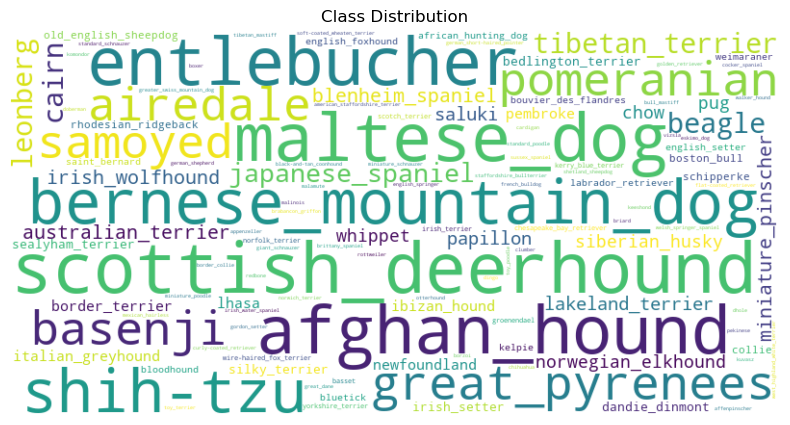

In [6]:
from wordcloud import WordCloud
class_distribution = labels['breed'].value_counts()

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(class_distribution)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Class Distribution')
plt.show()


## Data Preprocessing

In [7]:
from transformers import ViTImageProcessor

model_name_or_path = 'google/vit-base-patch16-224-in21k'
processor = ViTImageProcessor.from_pretrained(model_name_or_path)

In [8]:
class CustomDataset(Dataset):
    def __init__(self, image_folder, csv_file, processor, label2id):
        self.image_folder = image_folder
        self.df = pd.read_csv(csv_file)
        self.processor = processor
        self.label2id = label2id
    
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        self.img_path = os.path.join(self.image_folder, self.df.iloc[idx, 0]+".jpg")
        self.img = Image.open(self.img_path).convert("RGB")
        self.label = self.label2id[self.df.iloc[idx, 1]]
        self.pixels = self.processor(images=self.img, return_tensors="pt")["pixel_values"].squeeze()
        return {
            "pixel_values": self.pixels,
            "labels": self.label
        }
        


In [9]:
label2id= {label:ind for ind, label in enumerate(labels.breed.unique())}
id2label= {ind:label for ind, label in enumerate(labels.breed.unique())}
from torch.utils.data import random_split

full_dataset = CustomDataset(image_folder="train", csv_file="labels.csv", processor=processor, label2id=label2id)

train_len = int(0.8 * len(full_dataset))
valid_len = len(full_dataset) - train_len

train_dataset, valid_dataset = random_split(full_dataset, [train_len, valid_len])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False)


In [10]:
batch = next(iter(train_loader))
batch["pixel_values"].shape, batch["labels"].shape

(torch.Size([32, 3, 224, 224]), torch.Size([32]))

In [11]:
train_dataset[2]

{'pixel_values': tensor([[[-0.3098, -0.3255, -0.2941,  ..., -0.4510, -0.3882, -0.3647],
          [-0.3333, -0.3412, -0.3255,  ..., -0.4510, -0.3961, -0.3725],
          [-0.3647, -0.3647, -0.3569,  ..., -0.4431, -0.3882, -0.3647],
          ...,
          [-0.1686, -0.2235, -0.3412,  ..., -0.2471, -0.2941, -0.2392],
          [-0.1922, -0.2706, -0.3490,  ..., -0.2627, -0.3490, -0.3255],
          [-0.2157, -0.3333, -0.3255,  ..., -0.2941, -0.3176, -0.2941]],
 
         [[-0.3569, -0.3725, -0.3333,  ..., -0.4353, -0.4431, -0.4431],
          [-0.3804, -0.3882, -0.3647,  ..., -0.4431, -0.4431, -0.4353],
          [-0.4039, -0.4039, -0.3961,  ..., -0.4353, -0.4353, -0.4275],
          ...,
          [-0.1765, -0.2314, -0.3333,  ..., -0.2078, -0.2471, -0.1843],
          [-0.2000, -0.2784, -0.3490,  ..., -0.2314, -0.3098, -0.2784],
          [-0.2235, -0.3412, -0.3176,  ..., -0.2627, -0.2784, -0.2471]],
 
         [[-0.5373, -0.5608, -0.5059,  ..., -0.5294, -0.5373, -0.5294],
          [-

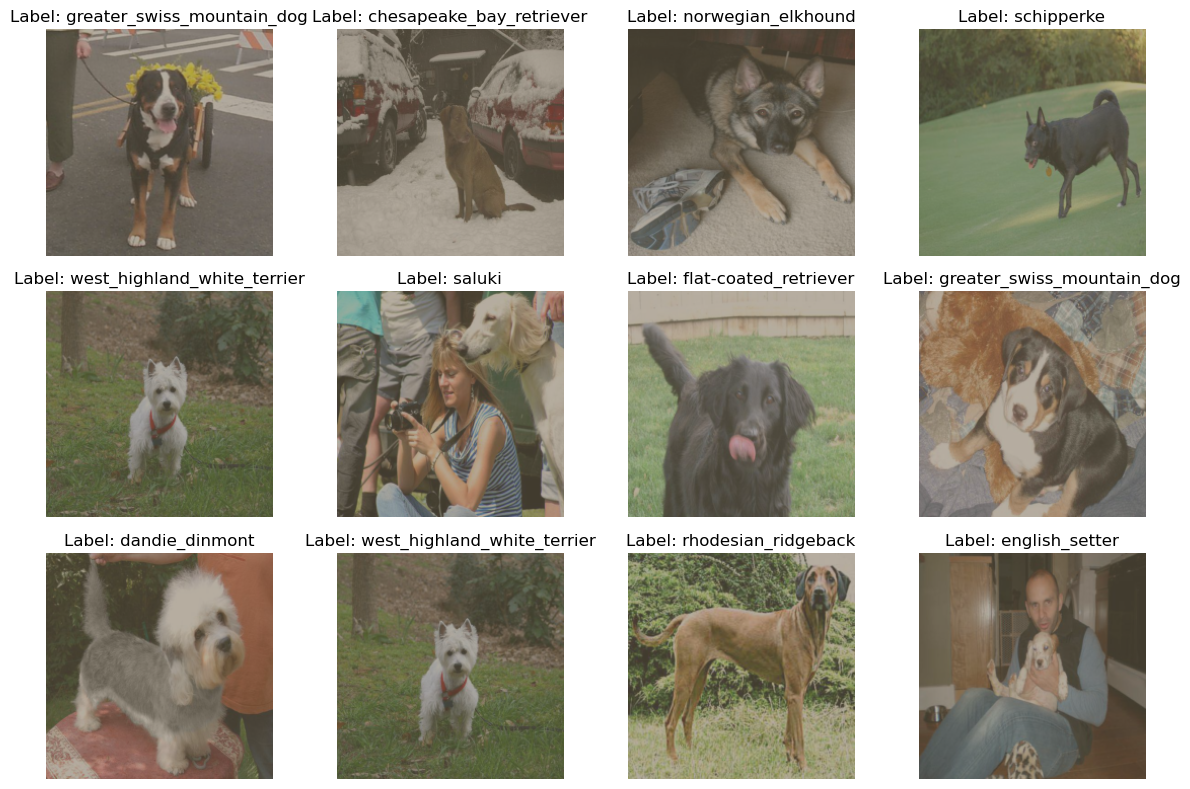

In [12]:
import matplotlib.pyplot as plt
import random
import torch

# Function to denormalize and convert tensor to numpy array
def denormalize(tensor):
    mean = torch.tensor([0.485, 0.456, 0.406]).to(dtype=torch.float32)
    std = torch.tensor([0.229, 0.224, 0.225]).to(dtype=torch.float32)
    tensor = tensor.squeeze().permute(1, 2, 0).to(dtype=torch.float32)
    tensor = tensor * std + mean
    tensor = torch.clamp(tensor, 0, 1)
    return tensor.numpy()


# Initialize figure

def show_imgs(num:int = 12):
    # Loop to plot random samples
    plt.figure(figsize=(12, 8))
    for i in range(num):
        idx = random.randint(0, 120)  # Assuming you have more than 120 samples
        sample = train_dataset[idx]
        image = denormalize(sample["pixel_values"])
        label = id2label[sample["labels"]]
        plt.subplot(3,4, i + 1) 
        plt.imshow(image)
        plt.title(f"Label: {label}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()
    
show_imgs()


## Get a model

In [13]:
from transformers import TrainingArguments
from transformers import ViTForImageClassification
from datasets import load_metric
from transformers import Trainer

comet_ml is installed but `COMET_API_KEY` is not set.


In [14]:
def collate_fn(batch):
    return {
        'pixel_values': torch.stack([x['pixel_values'] for x in batch]),
        'labels': torch.tensor([x['labels'] for x in batch])
    }

In [15]:
metric = load_metric("accuracy")
def compute_metrics(p):
    return metric.compute(predictions=np.argmax(p.predictions, axis=1), references=p.label_ids)

/var/folders/54/bsd8kfld1_xcw8npb7rc2qgw0000gn/T/ipykernel_46906/3314281577.py:1: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("accuracy")


In [16]:
model = ViTForImageClassification.from_pretrained(
    model_name_or_path,
    num_labels=NUM_CLASSES,
    id2label=id2label,
    label2id=label2id
)


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [17]:
training_args = TrainingArguments(
  output_dir="./vit-base-beans",
  per_device_train_batch_size=32,
  evaluation_strategy="steps",
  num_train_epochs=4,
  save_steps=100,
  eval_steps=100,
  logging_steps=10,
  learning_rate=2e-4,
  save_total_limit=2,
  remove_unused_columns=False,
  push_to_hub=False,
  report_to='tensorboard',
  load_best_model_at_end=True,
)


In [18]:
trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=collate_fn,
    compute_metrics=compute_metrics,
    train_dataset=train_dataset,
    eval_dataset=valid_dataset,
    tokenizer=processor,
)

In [19]:
train_results = trainer.train()
trainer.save_model()
trainer.log_metrics("train", train_results.metrics)
trainer.save_metrics("train", train_results.metrics)
trainer.save_state()


/Users/krittinsetdhavanich/pytorch-test/torch_env/lib/python3.8/site-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy
100,3.512700,3.390224,0.618582
200,2.505000,2.503615,0.680196
300,1.526500,1.870752,0.713936
400,1.081500,1.402388,0.740342
500,0.808800,1.200310,0.755012
600,0.474800,1.009476,0.774572
700,0.425200,0.951682,0.777995
800,0.231600,0.868823,0.793643
900,0.187900,0.841205,0.795110
1000,0.191500,0.822162,0.803423


***** train metrics *****
  epoch                    =          4.0
  total_flos               = 2363034141GF
  train_loss               =        1.268
  train_runtime            =   2:00:09.41
  train_samples_per_second =        4.537
  train_steps_per_second   =        0.142


In [22]:
!tensorboard --logdir="./vit-base-beans"

TensorFlow installation not found - running with reduced feature set.

NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.12.1 at http://localhost:6006/ (Press CTRL+C to quit)
^C
